<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/3)_Practical_assignment_minimal_distance_head_to_head_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment**:
Count the head to head (5' end to 5' end) distance between reads in the BED file containing FUS gene from Homo sapiens K562 (https://www.encodeproject.org/files/ENCFF861KMV/). Plot a distribution plot of the distances between reads.


Download the BED file, unzip it, sort it in an ascending order by the chromosome name and the start coordinate. Create a dictionary with reads separated into those on the plus and those on the minus strand. Subsequently, create a dictionary with the chromosomes, strands, and the smallest head to head distance between the reads. Create a dataframe, and plot a distribution plot of the minimal distance between the reads.

Note: BED file is zero-based and half-open coordinate system; the index counting starts from 0 and the last index of the chromosome end is excluded. 
http://genome.ucsc.edu/blog/the-ucsc-genome-browser-coordinate-counting-systems/
https://plastid.readthedocs.io/en/latest/concepts/coordinates.html#start-end
https://arnaudceol.wordpress.com/2014/09/18/chromosome-coordinate-systems-0-based-1-based/

#**Distribution of the head to head distance between reads - step by step approach.**

I. Download the BED file. You can use the BED reader function from the Python package.

In [0]:
# Import get and decompress functions which you will need for the BED reader function.
from requests import get
from gzip import decompress

# Define a function that will download the compressed (gz) BED file,
# and it will decompress it to text.
# Helper function get_gzipped_bed_ is inside the main bed_reader function.
def bed_reader(target_url, output_name):
  def get_gzipped_bed_(target_url):
    downloaded_bed = get(target_url).content
    decompressed_bed = decompress(downloaded_bed)
    return decompressed_bed
  decompressed = get_gzipped_bed_(target_url)
  bed_file_human_readable = decompressed.decode()
  # Write bed file to new file on the disk
  output_file = open(output_name, "w")
  output_file.write(bed_file_human_readable)
  output_file.close()
  return output_name

# Call the outer function and provide it with two arguments - url and arbitrary 
# output name.
bed_reader("https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz", 
           "ENCFF861KMV.bed")

'ENCFF861KMV.bed'

II. Sort the BED file in the ascending order by the chromosome name and the start coordinate.

A. Send command to Unix.

In [0]:
# Sort out the BED file, and save the content in a file.
!sort -k1,1 -k2,2n ENCFF861KMV.bed > ENCFF861KMVsorted.bed

In [0]:
!sort -k1,1 -k2,2n ENCFF861KMV.bed 

chr1	632546	632615	FUS_K562_IDR	1000	+	3.82686687508738	6.50783294676379	-1	-1
chr1	965337	965476	FUS_K562_IDR	1000	+	3.12362327712992	3.53719425627146	-1	-1
chr1	1035440	1035512	FUS_K562_IDR	1000	+	3.18112338442576	3.83337927656262	-1	-1
chr1	1035894	1035948	FUS_K562_IDR	1000	+	3.73779412096374	3.59568021751587	-1	-1
chr1	1035967	1036051	FUS_K562_IDR	1000	+	3.18200361335799	6.044609576236	-1	-1
chr1	1036331	1036425	FUS_K562_IDR	1000	+	3.5903003449292	6.29667912525784	-1	-1
chr1	1036540	1036620	FUS_K562_IDR	1000	+	3.23250781628894	4.57625554730423	-1	-1
chr1	1036926	1036982	FUS_K562_IDR	1000	+	3.79964298307618	3.18534281531791	-1	-1
chr1	1037116	1037181	FUS_K562_IDR	1000	+	3.27222505003613	4.18593355349903	-1	-1
chr1	1037598	1037673	FUS_K562_IDR	1000	+	3.44942312400564	5.14061189005205	-1	-1
chr1	1038017	1038119	FUS_K562_IDR	1000	+	3.17764700410488	3.96670735689592	-1	-1
chr1	1038828	1038931	FUS_K562_IDR	1000	+	3.67938728847236	6.8734828689097	-1	-1
chr1	1039224	1039324	FUS_K562_IDR	10

B. Convert BED file to pandas dataframe and use 
pandas.DataFrame.sort_values(by=[]).

In [0]:
import pandas as pd
dataframe = pd.read_csv("https://www.encodeproject.org/files/ENCFF861KMV/"
"@@download/ENCFF861KMV.bed.gz", compression="gzip", sep="\t", 
                        names=["chrom", "start", "end", "name", "score", "strand", "7", "8", "9", "10"])

dataframe.sort_values(by=["chrom", "start"], inplace=True)

C. Use Pybedtools – pybedtools.bedtool.BedTool.sort.

In [0]:
! apt-get remove  bedtools
! pip uninstall pybedtools
! pip uninstall bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  bedtools
0 upgraded, 0 newly installed, 1 to remove and 25 not upgraded.
After this operation, 2,040 kB disk space will be freed.
(Reading database ... 133923 files and directories currently installed.)
Removing bedtools (2.26.0+dfsg-5) ...
Uninstalling pybedtools-0.8.1:
  Would remove:
    /usr/local/bin/annotate.py
    /usr/local/bin/intersection_matrix.py
    /usr/local/bin/intron_exon_reads.py
    /usr/local/bin/pbt_plotting_example.py
    /usr/local/bin/peak_pie.py
    /usr/local/bin/pybedtools
    /usr/local/bin/venn_gchart.py
    /usr/local/bin/venn_mpl.py
    /usr/local/lib/python3.6/dist-packages/pybedtools-0.8.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pybedtools/*
Proceed (y/n)? y
  Successfully uninstalled pybedtools-0.8.1


In [0]:
! apt-get install bedtools
! pip install pybedtools
! bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 577 kB of archives.
After this operation, 2,040 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 bedtools amd64 2.26.0+dfsg-5 [577 kB]
Fetched 577 kB in 1s (486 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../bedtools_2.26.0+dfsg-5_amd64.deb ...
Unpacking bedtools (2.26.0+dfsg-5) ...
Setting up bedtools (2.26.0+dfsg-5) ...
Processing /root/.cache/pip/wheels/6b/50/97/7d0e4f605d0d1578997f4bba3061869c2dee9f8cd29f626323/pybedtools-0.8.1-cp36-cp36m-linux_x86_64.whl


bedtools is a powerful toolset for genome arithmetic.

Version:   v2.26.0
About:     developed in the quinlanlab.org and by many contributors worldwide.
Docs:      http://bedtools.readthedocs.io/
Code:      https://github.com/arq5x/bedtools2
Mail:      https://groups.google.com/forum/#!forum/bedtools-discuss

Usage:     bedtools <subcommand> [options]

The bedtools sub-commands include:

[ Genome arithmetic ]
    intersect     Find overlapping intervals in various ways.
    window        Find overlapping intervals within a window around an interval.
    closest       Find the closest, potentially non-overlapping interval.
    coverage      Compute the coverage over defined intervals.
    map           Apply a function to a column for each overlapping interval.
    genomecov     Compute the coverage over an entire genome.
    merge         Combine overlapping/nearby intervals into a single interval.
    cluster       Cluster (but don't merge) overlapping/nearby intervals.
    complement

In [0]:
import pybedtools
from pybedtools import BedTool
input_file = pybedtools.BedTool("ENCFF861KMV.bed")
print(input_file.sort())
i = input_file.sort()

chr1	632546	632615	FUS_K562_IDR	1000	+	3.82686687508738	6.50783294676379	-1	-1
chr1	965337	965476	FUS_K562_IDR	1000	+	3.12362327712992	3.53719425627146	-1	-1
chr1	1035440	1035512	FUS_K562_IDR	1000	+	3.18112338442576	3.83337927656262	-1	-1
chr1	1035894	1035948	FUS_K562_IDR	1000	+	3.73779412096374	3.59568021751587	-1	-1
chr1	1035967	1036051	FUS_K562_IDR	1000	+	3.18200361335799	6.044609576236	-1	-1
chr1	1036331	1036425	FUS_K562_IDR	1000	+	3.5903003449292	6.29667912525784	-1	-1
chr1	1036540	1036620	FUS_K562_IDR	1000	+	3.23250781628894	4.57625554730423	-1	-1
chr1	1036926	1036982	FUS_K562_IDR	1000	+	3.79964298307618	3.18534281531791	-1	-1
chr1	1037116	1037181	FUS_K562_IDR	1000	+	3.27222505003613	4.18593355349903	-1	-1
chr1	1037598	1037673	FUS_K562_IDR	1000	+	3.44942312400564	5.14061189005205	-1	-1
chr1	1038017	1038119	FUS_K562_IDR	1000	+	3.17764700410488	3.96670735689592	-1	-1
chr1	1038828	1038931	FUS_K562_IDR	1000	+	3.67938728847236	6.8734828689097	-1	-1
chr1	1039224	1039324	FUS_K562_IDR	10

III. Create a dictionary with reads separated into those on the plus and those on the minus strand.

A. Unix command option.

In [0]:
# Create an empty dictionary. 
dict_r_unix = {}
# Open sorted BED file.
with open("ENCFF861KMVsorted.bed", "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_unix:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_unix[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r_unix[chrom_name][strand].append(start) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r_unix[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r_unix[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_unix[chrom_name][strand].append(start) 
        else:
          dict_r_unix[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_unix[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_unix[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r_unix[chrom_name][strand].append(start) 
      # If the strand is minus, append start to the list.
      else:
        dict_r_unix[chrom_name][strand].append(end)
print(dict_r_unix)

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

B. Pandas option.

In [0]:
# Create an empty dictionary. 
# Convert the dataframe into a dictionary of reads.
dataframe.to_dict('dict_r_pandas')
dict_r_pandas = {}
# Open sorted BED file.
with open("ENCFF861KMVsorted.bed", "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_pandas:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_pandas[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r_pandas[chrom_name][strand].append(start) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r_pandas[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r_pandas[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_pandas[chrom_name][strand].append(start) 
        else:
          dict_r_pandas[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_pandas[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_pandas[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r_pandas[chrom_name][strand].append(start) 
      # If the strand is minus, append start to the list.
      else:
        dict_r_pandas[chrom_name][strand].append(end)
print(dict_r_pandas)

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

C. Pybedtools option.

In [0]:
# Create an empty dictionary. 
dict_r_pybed = {}
# Open sorted BED file.
with open(i.fn, "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_pybed:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_pybed[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r_pybed[chrom_name][strand].append(start) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r_pybed[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r_pybed[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_pybed[chrom_name][strand].append(start) 
        else:
          dict_r_pybed[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_pybed[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_pybed[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r_pybed[chrom_name][strand].append(start) 
      # If the strand is minus, append start to the list.
      else:
        dict_r_pybed[chrom_name][strand].append(end)
print(dict_r_pybed)

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

IV. Create a dictionary with the chromosomes and the smallest head to head distance.

There are two options how to avoid error induced 
when "for" loop reaches the end of the dictionary.

1) Try and except IndexError approach.

A. Unix command option.

In [0]:
# Create empty dictionary. 
dict_dis_unix = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new 
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_unix:
  dict_dis_unix[chrom_name] = {"+" : list(), "-" : list()}
  # Sort the plus and the minus strand into the corresponding list in the same manner 
  # as in the III. 
  for strand in dict_r_unix[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can be avoided by "try"
      # and "except IndexError".
      try:
        # For index in the range from 0 to the last of the reads on the minus
        # strand in the dictionary of reads.
        for s in range(0,len(dict_r_unix[chrom_name][strand])): 
          # Subtract the left start (index) from the right start (index + 1).
          # Append the obtained distance to the minus strand. Carry on till the
          # end of the dictionary.
          right_start = dict_r_unix[chrom_name][strand][s+1]          
          left_start = dict_r_unix[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_unix[chrom_name][strand].append(distance)
      except IndexError:
        "null"
    else:
      try:
        # For index in the range from 0 to the last of the reads on the plus
        # strand in the dictionary of reads.
        for e in range(0,len(dict_r_unix[chrom_name][strand])):
          # Subtract the left end (index) from the right end (index + 1).
          # Append the obtained distance to the plus strand. Carry on till the
          # end of the dictionary.
          right_end = dict_r_unix[chrom_name][strand][e+1]          
          left_end = dict_r_unix[chrom_name][strand][e]        
          distance = right_end - left_end 
          dict_dis_unix[chrom_name][strand].append(distance)
      except IndexError:
        "null"
        
print(dict_r_unix) # Printing the dictionary with reads.
print(dict_dis_unix) # Printing the dictionary with the closest distance.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

B. Pandas option.

In [0]:
# Create empty dictionary. 
dict_dis_pandas = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new 
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_pandas:
  dict_dis_pandas[chrom_name] = {"+" : list(), "-" : list()}
  # Sort the plus and the minus strand into the corresponding list in the same manner 
  # as in the III. 
  for strand in dict_r_pandas[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can be avoided by "try"
      # and "except IndexError".
      try:
        # For index in the range from 0 to the last of the reads on the minus
        # strand in the dictionary of reads.
        for s in range(0,len(dict_r_pandas[chrom_name][strand])): 
          # Subtract the left start (index) from the right start (index + 1).
          # Append the obtained distance to the minus strand. Carry on till the
          # end of the dictionary.
          right_start = dict_r_pandas[chrom_name][strand][s+1]          
          left_start = dict_r_pandas[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_pandas[chrom_name][strand].append(distance)
      except IndexError:
        "null"
    else:
      try:
        # For index in the range from 0 to the last of the reads on the plus
        # strand in the dictionary of reads.
        for e in range(0,len(dict_r_pandas[chrom_name][strand])):
          # Subtract the left end (index) from the right end (index + 1).
          # Append the obtained distance to the plus strand. Carry on till the
          # end of the dictionary.
          right_end = dict_r_pandas[chrom_name][strand][e+1]          
          left_end = dict_r_pandas[chrom_name][strand][e]        
          distance = right_end - left_end 
          dict_dis_pandas[chrom_name][strand].append(distance)
      except IndexError:
        "null"
        
print(dict_r_pandas) # Printing the dictionary with reads.
print(dict_dis_pandas) # Printing the dictionary with the closest distance.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

C. Pybedtools option.

In [0]:
# Create empty dictionary. 
dict_dis_pybed = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new 
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_pybed:
  dict_dis_pybed[chrom_name] = {"+" : list(), "-" : list()}
  # Sort the plus and the minus strand into the corresponding list in the same manner 
  # as in the III. 
  for strand in dict_r_pybed[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can be avoided by "try"
      # and "except IndexError".
      try:
        # For index in the range from 0 to the last of the reads on the minus
        # strand in the dictionary of reads.
        for s in range(0,len(dict_r_pybed[chrom_name][strand])): 
          # Subtract the left start (index) from the right start (index + 1).
          # Append the obtained distance to the minus strand. Carry on till the
          # end of the dictionary.
          right_start = dict_r_pybed[chrom_name][strand][s+1]          
          left_start = dict_r_pybed[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_pybed[chrom_name][strand].append(distance)
      except IndexError:
        "null"
    else:
      try:
        # For index in the range from 0 to the last of the reads on the plus
        # strand in the dictionary of reads.
        for e in range(0,len(dict_r_pybed[chrom_name][strand])):
          # Subtract the left end (index) from the right end (index + 1).
          # Append the obtained distance to the plus strand. Carry on till the
          # end of the dictionary.
          right_end = dict_r_pybed[chrom_name][strand][e+1]          
          left_end = dict_r_pybed[chrom_name][strand][e]        
          distance = right_end - left_end 
          dict_dis_pybed[chrom_name][strand].append(distance)
      except IndexError:
        "null"
        
print(dict_r_pybed) # Printing the dictionary with reads.
print(dict_dis_pybed) # Printing the dictionary with the closest distance.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

2) Exclusion of the last index with - 1.

A. Unix command option.

In [0]:
dict_dis_unix = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_unix:
  dict_dis_unix[chrom_name] = {"+" : list(), "-" : list()}
  # Sort plus and minus strand into the corresponding list in the same manner 
  # as in the III.
  for strand in dict_r_unix[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can avoided by excluding 
      # the last index with - 1.
      for s in range(0,len(dict_r_unix[chrom_name][strand]) - 1 ):
          right_start = dict_r_unix[chrom_name][strand][s+1]          
          left_start = dict_r_unix[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_unix[chrom_name][strand].append(distance)
  
    else:
      for e in range(0,len(dict_r_unix[chrom_name][strand]) - 1 ):
        right_end = dict_r_unix[chrom_name][strand][e+1]          
        left_end = dict_r_unix[chrom_name][strand][e]        
        distance = right_end - left_end 
        dict_dis_unix[chrom_name][strand].append(distance)
print(dict_r_unix) # Printing the dictionary with reads.
print(dict_dis_unix) # Printing the dictionary with the minimal distances.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

B. Pandas option.

In [0]:
dict_dis_pandas= {}
# For each chromosome in the dictionary of reads create a chrom_name in the new
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_pandas:
  dict_dis_pandas[chrom_name] = {"+" : list(), "-" : list()}
  # Sort plus and minus strand into the corresponding list in the same manner 
  # as in the III.
  for strand in dict_r_pandas[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can avoided by excluding 
      # the last index with - 1.
      for s in range(0,len(dict_r_pandas[chrom_name][strand]) - 1 ):
          right_start = dict_r_pandas[chrom_name][strand][s+1]          
          left_start = dict_r_pandas[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_pandas[chrom_name][strand].append(distance)
  
    else:
      for e in range(0,len(dict_r_pandas[chrom_name][strand]) - 1 ):
        right_end = dict_r_pandas[chrom_name][strand][e+1]          
        left_end = dict_r_pandas[chrom_name][strand][e]        
        distance = right_end - left_end 
        dict_dis_pandas[chrom_name][strand].append(distance)
print(dict_r_pandas) # Printing the dictionary with reads.
print(dict_dis_pandas) # Printing the dictionary with the minimal distances.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

C. Pybedtools option.

In [0]:
dict_dis_pybed= {}
# For each chromosome in the dictionary of reads create a chrom_name in the new
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_pybed:
  dict_dis_pybed[chrom_name] = {"+" : list(), "-" : list()}
  # Sort plus and minus strand into the corresponding list in the same manner 
  # as in the III.
  for strand in dict_r_pybed[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can avoided by excluding 
      # the last index with - 1.
      for s in range(0,len(dict_r_pybed[chrom_name][strand]) - 1 ):
          right_start = dict_r_pybed[chrom_name][strand][s+1]          
          left_start = dict_r_pybed[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_pybed[chrom_name][strand].append(distance)
  
    else:
      for e in range(0,len(dict_r_pybed[chrom_name][strand]) - 1 ):
        right_end = dict_r_pybed[chrom_name][strand][e+1]          
        left_end = dict_r_pybed[chrom_name][strand][e]        
        distance = right_end - left_end 
        dict_dis_pybed[chrom_name][strand].append(distance)
print(dict_r_pybed) # Printing the dictionary with reads.
print(dict_dis_pybed) # Printing the dictionary with the minimal distances.

{'chr1': {'+': [632546, 965337, 1035440, 1035894, 1035967, 1036331, 1036540, 1036926, 1037116, 1037598, 1038017, 1038828, 1039224, 1052528, 1052607, 1052706, 1052859, 1401463, 2229887, 2229974, 2230419, 2230970, 2231243, 2231368, 2231811, 2232324, 2232915, 2233233, 2233524, 2233696, 2234011, 2234098, 2234170, 2234324, 2235614, 2235738, 2236218, 2236802, 2237307, 2238326, 2238567, 2239349, 2239424, 2239646, 2240215, 2240296, 2240495, 2241961, 2242180, 2242334, 2246671, 2247240, 2248208, 2248882, 2248932, 2249452, 2251610, 2252537, 2252616, 2253697, 2267523, 2267630, 2268478, 2268672, 2269602, 2270261, 2273232, 2273361, 2273431, 2273586, 2284751, 2292294, 2293186, 2392115, 2392805, 2393248, 2393385, 2393591, 2394166, 2394338, 2394449, 2394755, 2394958, 2395272, 2395360, 11023796, 12012355, 15847882, 15848814, 15849414, 15849543, 16449448, 19608050, 23371219, 25821200, 28565125, 28565815, 35883397, 35883500, 35883914, 42975279, 44760540, 44763170, 44763317, 46310154, 55040269, 55047708, 5

To exclude the outliers from the dictionary of distances, you need to compare the absolute value of the number to the absolute value of the previous one and to the absolute value of next number.

V. Create a dictionary with the closest distances without outliers.

A. Unix command option.

In [0]:
dict_clos_unix = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_dis_unix:
  dict_clos_unix[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_dis_unix[chrom_name]:
    if strand == "+":
      try:
        for dist_start in range(0,len(dict_dis_unix[chrom_name][strand])): 
          # This time, you need to compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
          this_start_pos = dict_dis_unix[chrom_name][strand][dist_start]
          right_start_neigh = dict_dis_unix[chrom_name][strand][dist_start+1]          
          left_start_neigh = dict_dis_unix[chrom_name][strand][dist_start-1]    
          dist1 = this_start_pos - left_start_neigh 
          dist1 = abs(dist1)    
          dist2 = right_start_neigh - this_start_pos    
          dist2 = abs(dist2)  
          if dist1 < dist2:
            dict_clos_unix[chrom_name][strand].append(left_start_neigh)
          else:
            dict_clos_unix[chrom_name][strand].append(right_start_neigh)
      except IndexError:
        "null" 
      
    else:
      try:
        for dist_end in range(0,len(dict_dis_unix[chrom_name][strand])): 
          this_end_pos = dict_dis_unix[chrom_name][strand][dist_end]
          right_end_neigh = dict_dis_unix[chrom_name][strand][dist_end+1]          
          left_end_neigh = dict_dis_unix[chrom_name][strand][dist_end-1]    
          dist1 = this_end_pos - left_end_neigh    
          dist1 = abs(dist1)    
          dist2 = right_end_neigh - this_end_pos    
          dist2 = abs(dist2)           
          if dist1 < dist2:
            dict_clos_unix[chrom_name][strand].append(left_end_neigh)
          else:
            dict_clos_unix[chrom_name][strand].append(right_end_neigh)
      except IndexError:
        "null" 
print(dict_dis_pybed)
print(dict_clos_unix)

{'chr1': {'+': [332791, 70103, 454, 73, 364, 209, 386, 190, 482, 419, 811, 396, 13304, 79, 99, 153, 348604, 828424, 87, 445, 551, 273, 125, 443, 513, 591, 318, 291, 172, 315, 87, 72, 154, 1290, 124, 480, 584, 505, 1019, 241, 782, 75, 222, 569, 81, 199, 1466, 219, 154, 4337, 569, 968, 674, 50, 520, 2158, 927, 79, 1081, 13826, 107, 848, 194, 930, 659, 2971, 129, 70, 155, 11165, 7543, 892, 98929, 690, 443, 137, 206, 575, 172, 111, 306, 203, 314, 88, 8628436, 988559, 3835527, 932, 600, 129, 599905, 3158602, 3763169, 2449981, 2743925, 690, 7317582, 103, 414, 7091365, 1785261, 2630, 147, 1546837, 8730115, 7439, 1519, 31866109, 26158366, 37478223, 8296, 126, 375, 3082611, 577919, 1091184, 110, 51, 762, 33, 31, 92, 6992, 16271367, 189842, 752097, 10353432, 585412, 14684764, 9487993, 166, 200, 106801, 194, 19202056, 123, 3294, 1488, 1039, 1121991, 422, 149, 663, 4179, 126, 105, 710, 1139, 130, 77, 303, 517, 49213, 1095, 69, 382, 252, 182, 141, 523, 438, 142, 263, 102, 72, 676, 125, 141, 36713, 

B. Pandas option.

In [0]:
dict_clos_pandas = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_dis_pandas:
  dict_clos_pandas[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_dis_pandas[chrom_name]:
    if strand == "+":
      try:
        for dist_start in range(0,len(dict_dis_pandas[chrom_name][strand])):
          # This time, you need to compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
          this_start_pos = dict_dis_pandas[chrom_name][strand][dist_start]
          right_start_neigh = dict_dis_pandas[chrom_name][strand][dist_start+1]          
          left_start_neigh = dict_dis_pandas[chrom_name][strand][dist_start-1]    
          dist1 = this_start_pos - left_start_neigh 
          dist1 = abs(dist1)    
          dist2 = right_start_neigh - this_start_pos    
          dist2 = abs(dist2)  
          if dist1 < dist2:
            dict_clos_pandas[chrom_name][strand].append(left_start_neigh)
          else:
            dict_clos_pandas[chrom_name][strand].append(right_start_neigh)
      except IndexError:
        "null" 
      
    else:
      try:
        for dist_end in range(0,len(dict_dis_pandas[chrom_name][strand])): 
          this_end_pos = dict_dis_pandas[chrom_name][strand][dist_end]
          right_end_neigh = dict_dis_pandas[chrom_name][strand][dist_end+1]          
          left_end_neigh = dict_dis_pandas[chrom_name][strand][dist_end-1]    
          dist1 = this_end_pos - left_end_neigh    
          dist1 = abs(dist1)    
          dist2 = right_end_neigh - this_end_pos    
          dist2 = abs(dist2)           
          if dist1 < dist2:
            dict_clos_pandas[chrom_name][strand].append(left_end_neigh)
          else:
            dict_clos_pandas[chrom_name][strand].append(right_end_neigh)
      except IndexError:
        "null" 
print(dict_clos_pandas)

{'chr1': {'+': [70103, 454, 73, 364, 209, 364, 209, 386, 419, 482, 419, 811, 396, 99, 79, 99, 153, 348604, 445, 551, 445, 125, 273, 513, 443, 513, 291, 318, 291, 172, 72, 87, 72, 154, 480, 584, 505, 584, 505, 782, 241, 222, 75, 222, 199, 81, 219, 154, 219, 569, 968, 674, 968, 520, 50, 927, 79, 927, 79, 1081, 848, 194, 848, 659, 930, 659, 70, 129, 70, 7543, 11165, 7543, 892, 443, 690, 206, 137, 206, 111, 172, 203, 306, 203, 314, 988559, 3835527, 988559, 600, 932, 600, 129, 3763169, 3158602, 2743925, 2449981, 2743925, 690, 414, 103, 1785261, 2630, 147, 2630, 147, 1546837, 1519, 7439, 26158366, 31866109, 26158366, 126, 375, 126, 577919, 1091184, 577919, 51, 110, 51, 31, 33, 31, 92, 189842, 752097, 189842, 752097, 10353432, 9487993, 14684764, 200, 166, 200, 106801, 194, 3294, 1488, 1039, 1488, 1039, 149, 422, 149, 663, 105, 126, 1139, 710, 77, 130, 517, 303, 1095, 69, 382, 252, 182, 141, 182, 438, 523, 263, 142, 72, 102, 125, 141, 125, 141, 36713], '-': [106742, 23153, 116, 145, 116, 145, 

C. Pybedtools option.

In [0]:
dict_clos_pybed = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_dis_pybed:
  dict_clos_pybed[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_dis_pybed[chrom_name]:
    if strand == "+":
      try:
        for dist_start in range(0,len(dict_dis_pybed[chrom_name][strand])): 
          # This time, you need to compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
          this_start_pos = dict_dis_pybed[chrom_name][strand][dist_start]
          right_start_neigh = dict_dis_pybed[chrom_name][strand][dist_start+1]          
          left_start_neigh = dict_dis_pybed[chrom_name][strand][dist_start-1]    
          dist1 = this_start_pos - left_start_neigh 
          dist1 = abs(dist1)    
          dist2 = right_start_neigh - this_start_pos    
          dist2 = abs(dist2)  
          if dist1 < dist2:
            dict_clos_pybed[chrom_name][strand].append(left_start_neigh)
          else:
            dict_clos_pybed[chrom_name][strand].append(right_start_neigh)
      except IndexError:
        "null" 
      
    else:
      try:
        for dist_end in range(0,len(dict_dis_pybed[chrom_name][strand])): 
          this_end_pos = dict_dis_pybed[chrom_name][strand][dist_end]
          right_end_neigh = dict_dis_pybed[chrom_name][strand][dist_end+1]          
          left_end_neigh = dict_dis_pybed[chrom_name][strand][dist_end-1]    
          dist1 = this_end_pos - left_end_neigh    
          dist1 = abs(dist1)    
          dist2 = right_end_neigh - this_end_pos    
          dist2 = abs(dist2)           
          if dist1 < dist2:
            dict_clos_pybed[chrom_name][strand].append(left_end_neigh)
          else:
            dict_clos_pybed[chrom_name][strand].append(right_end_neigh)
      except IndexError:
        "null" 
print(dict_clos_pybed)

{'chr1': {'+': [70103, 454, 73, 364, 209, 364, 209, 386, 419, 482, 419, 811, 396, 99, 79, 99, 153, 348604, 445, 551, 445, 125, 273, 513, 443, 513, 291, 318, 291, 172, 72, 87, 72, 154, 480, 584, 505, 584, 505, 782, 241, 222, 75, 222, 199, 81, 219, 154, 219, 569, 968, 674, 968, 520, 50, 927, 79, 927, 79, 1081, 848, 194, 848, 659, 930, 659, 70, 129, 70, 7543, 11165, 7543, 892, 443, 690, 206, 137, 206, 111, 172, 203, 306, 203, 314, 988559, 3835527, 988559, 600, 932, 600, 129, 3763169, 3158602, 2743925, 2449981, 2743925, 690, 414, 103, 1785261, 2630, 147, 2630, 147, 1546837, 1519, 7439, 26158366, 31866109, 26158366, 126, 375, 126, 577919, 1091184, 577919, 51, 110, 51, 31, 33, 31, 92, 189842, 752097, 189842, 752097, 10353432, 9487993, 14684764, 200, 166, 200, 106801, 194, 3294, 1488, 1039, 1488, 1039, 149, 422, 149, 663, 105, 126, 1139, 710, 77, 130, 517, 303, 1095, 69, 382, 252, 182, 141, 182, 438, 523, 263, 142, 72, 102, 125, 141, 125, 141, 36713], '-': [106742, 23153, 116, 145, 116, 145, 

VI. Plot the distribution plot.

1) To plot the data from the dictionary, you need to convert the dictionary into
dataframe. 

A. Unix command option.

In [0]:
import pandas as pd

# Create an empty list.
list_unix_plus = list()
list_unix_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_clos_unix:
  # Create a temporary dictionary with the strands.
  dict_clos_unix_tmp = dict_clos_unix[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_clos_unix_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_clos_unix_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_unix_plus = pd.DataFrame(distance, columns=["distance"])
      dict_unix_plus["strand"] = strand
      dict_unix_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_unix_plus.append(dict_unix_plus)
    else:
      distance = dict_clos_unix_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_unix_min = pd.DataFrame(distance, columns=["distance"])
      dict_unix_min["strand"] = strand
      dict_unix_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_unix_min.append(dict_unix_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_unix_plus = pd.concat(list_unix_plus)
df_unix_minus = pd.concat(list_unix_min)
print(df_unix_plus)
print(df_unix_minus)
# Each column is a Pandas series.

   distance strand chromosome
0     70103      +       chr1
1       454      +       chr1
2        73      +       chr1
3       364      +       chr1
4       209      +       chr1
..      ...    ...        ...
24      381      +       chrX
25      764      +       chrX
26      381      +       chrX
27     4913      +       chrX
28     9150      +       chrX

[2298 rows x 3 columns]
    distance strand chromosome
0     106742      -       chr1
1      23153      -       chr1
2        116      -       chr1
3        145      -       chr1
4        116      -       chr1
..       ...    ...        ...
36   4695276      -       chrX
37     66310      -       chrX
38  50901574      -       chrX
39  47368103      -       chrX
40   2037963      -       chrX

[2078 rows x 3 columns]


B. Pandas option.

In [0]:
import pandas as pd

# Create an empty list.
list_pandas_plus = list()
list_pandas_min = list()
# Loop over the chromosome names in the dictionary. 
  # Create a temporary dictionary with the strands.
  # Loop over strands in the temporary dictionary.
for chrom_name in dict_clos_pandas:
  dict_clos_pandas_tmp = dict_clos_pandas[chrom_name]
  for strand in dict_clos_pandas_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_clos_pandas_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pandas_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pandas_plus["strand"] = strand
      dict_pandas_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pandas_plus.append(dict_pandas_plus)
    else:
      distance = dict_clos_pandas_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pandas_min = pd.DataFrame(distance, columns=["distance"])
      dict_pandas_min["strand"] = strand
      dict_pandas_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pandas_min.append(dict_pandas_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pandas_plus = pd.concat(list_pandas_plus)
df_pandas_minus = pd.concat(list_pandas_min)
print(df_pandas_plus)
print(df_pandas_minus)
# Each column is a Pandas series.

   distance strand chromosome
0     70103      +       chr1
1       454      +       chr1
2        73      +       chr1
3       364      +       chr1
4       209      +       chr1
..      ...    ...        ...
24      381      +       chrX
25      764      +       chrX
26      381      +       chrX
27     4913      +       chrX
28     9150      +       chrX

[2298 rows x 3 columns]
    distance strand chromosome
0     106742      -       chr1
1      23153      -       chr1
2        116      -       chr1
3        145      -       chr1
4        116      -       chr1
..       ...    ...        ...
36   4695276      -       chrX
37     66310      -       chrX
38  50901574      -       chrX
39  47368103      -       chrX
40   2037963      -       chrX

[2078 rows x 3 columns]


C. Pybedtools option.

In [0]:
import pandas as pd

# Create an empty list.
list_pybed_plus = list()
list_pybed_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_clos_pybed:
  # Create a temporary dictionary with the strands.
  dict_clos_pybed_tmp = dict_clos_pybed[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_clos_pybed_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_clos_pybed_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_plus["strand"] = strand
      dict_pybed_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_plus.append(dict_pybed_plus)
    else:
      distance = dict_clos_pybed_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_min = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_min["strand"] = strand
      dict_pybed_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_min.append(dict_pybed_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pybed_plus = pd.concat(list_pybed_plus)
df_pybed_minus = pd.concat(list_pybed_min)
print(df_pybed_plus)
print(df_pybed_minus)
# Each column is a Pandas series.

   distance strand chromosome
0     70103      +       chr1
1       454      +       chr1
2        73      +       chr1
3       364      +       chr1
4       209      +       chr1
..      ...    ...        ...
24      381      +       chrX
25      764      +       chrX
26      381      +       chrX
27     4913      +       chrX
28     9150      +       chrX

[2298 rows x 3 columns]
    distance strand chromosome
0     106742      -       chr1
1      23153      -       chr1
2        116      -       chr1
3        145      -       chr1
4        116      -       chr1
..       ...    ...        ...
36   4695276      -       chrX
37     66310      -       chrX
38  50901574      -       chrX
39  47368103      -       chrX
40   2037963      -       chrX

[2078 rows x 3 columns]


2) You have three options how to plot the distribution plot:

1. You can plot the plus and the minus strand into one plot.

A. Unix command option.

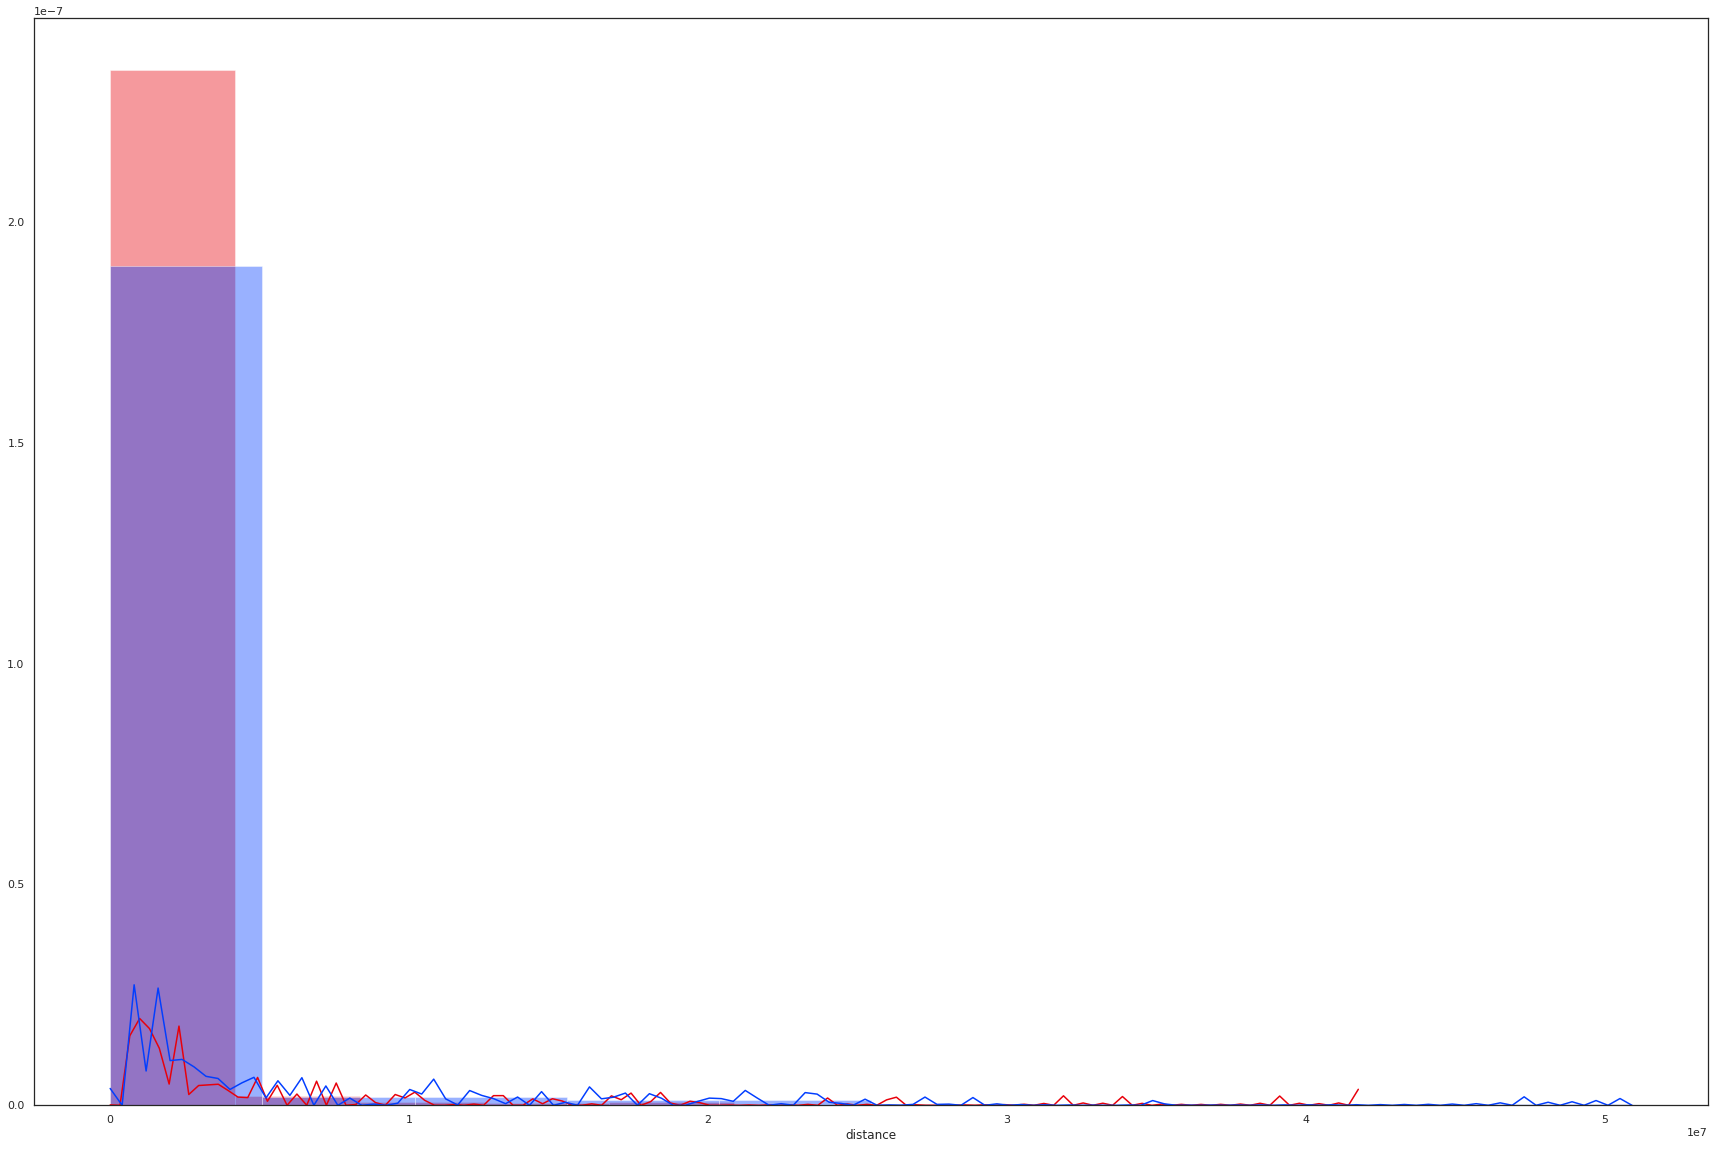

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# With sns.set you can adjust your graph, choose style - dark grid/white,
# color palette, font etc.
sns.set(style="white", palette="bright", color_codes=True)
# If you run both disttribution plots in the same cell, they
# will be plotted in an overlapping manner.
# Enter the column containing distance for each of the strands in a
# variable, choose bins and discerning colors. Plot the 
# distribution plot of both plus and minus strands.
sns.distplot(a=df_unix_plus["distance"], bins=10, color="r")
sns.distplot(a=df_unix_minus["distance"], bins=10, color="b")
# Adjust the size of the figure.
plt.gcf().set_size_inches((30, 20))

B. Pandas option.

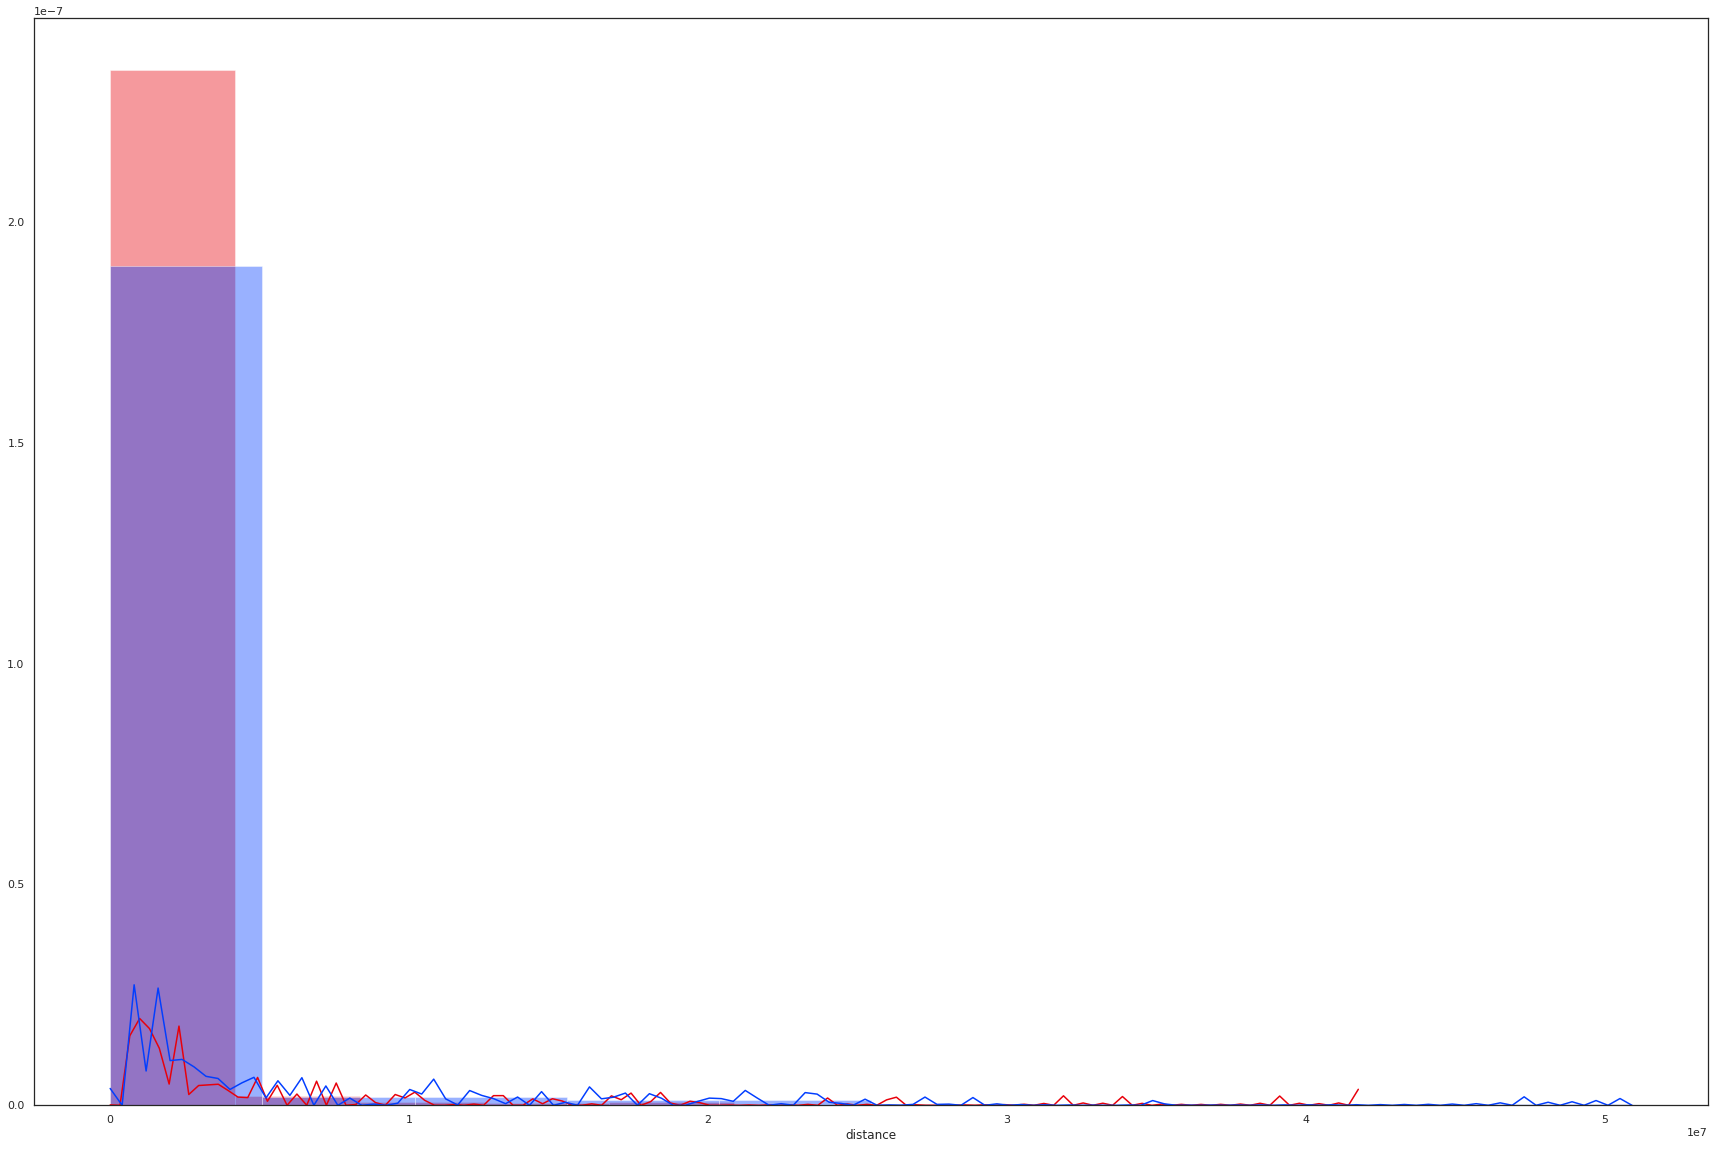

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# With sns.set you can adjust your graph, choose style - dark grid/white,
# color palette, font etc.
sns.set(style="white", palette="bright", color_codes=True)
# If you run both disttribution plots in the same cell, they
# will be plotted in an overlapping manner.
# Enter the column containing distance for each of the strands in a
# variable, choose bins and discerning colors. Plot the 
# distribution plot of both plus and minus strands.
sns.distplot(a=df_pandas_plus["distance"], bins=10, color="r")
sns.distplot(a=df_pandas_minus["distance"], bins=10, color="b")
# Adjust the size of the figure.
plt.gcf().set_size_inches((30, 20))

C. Pybedtools option.

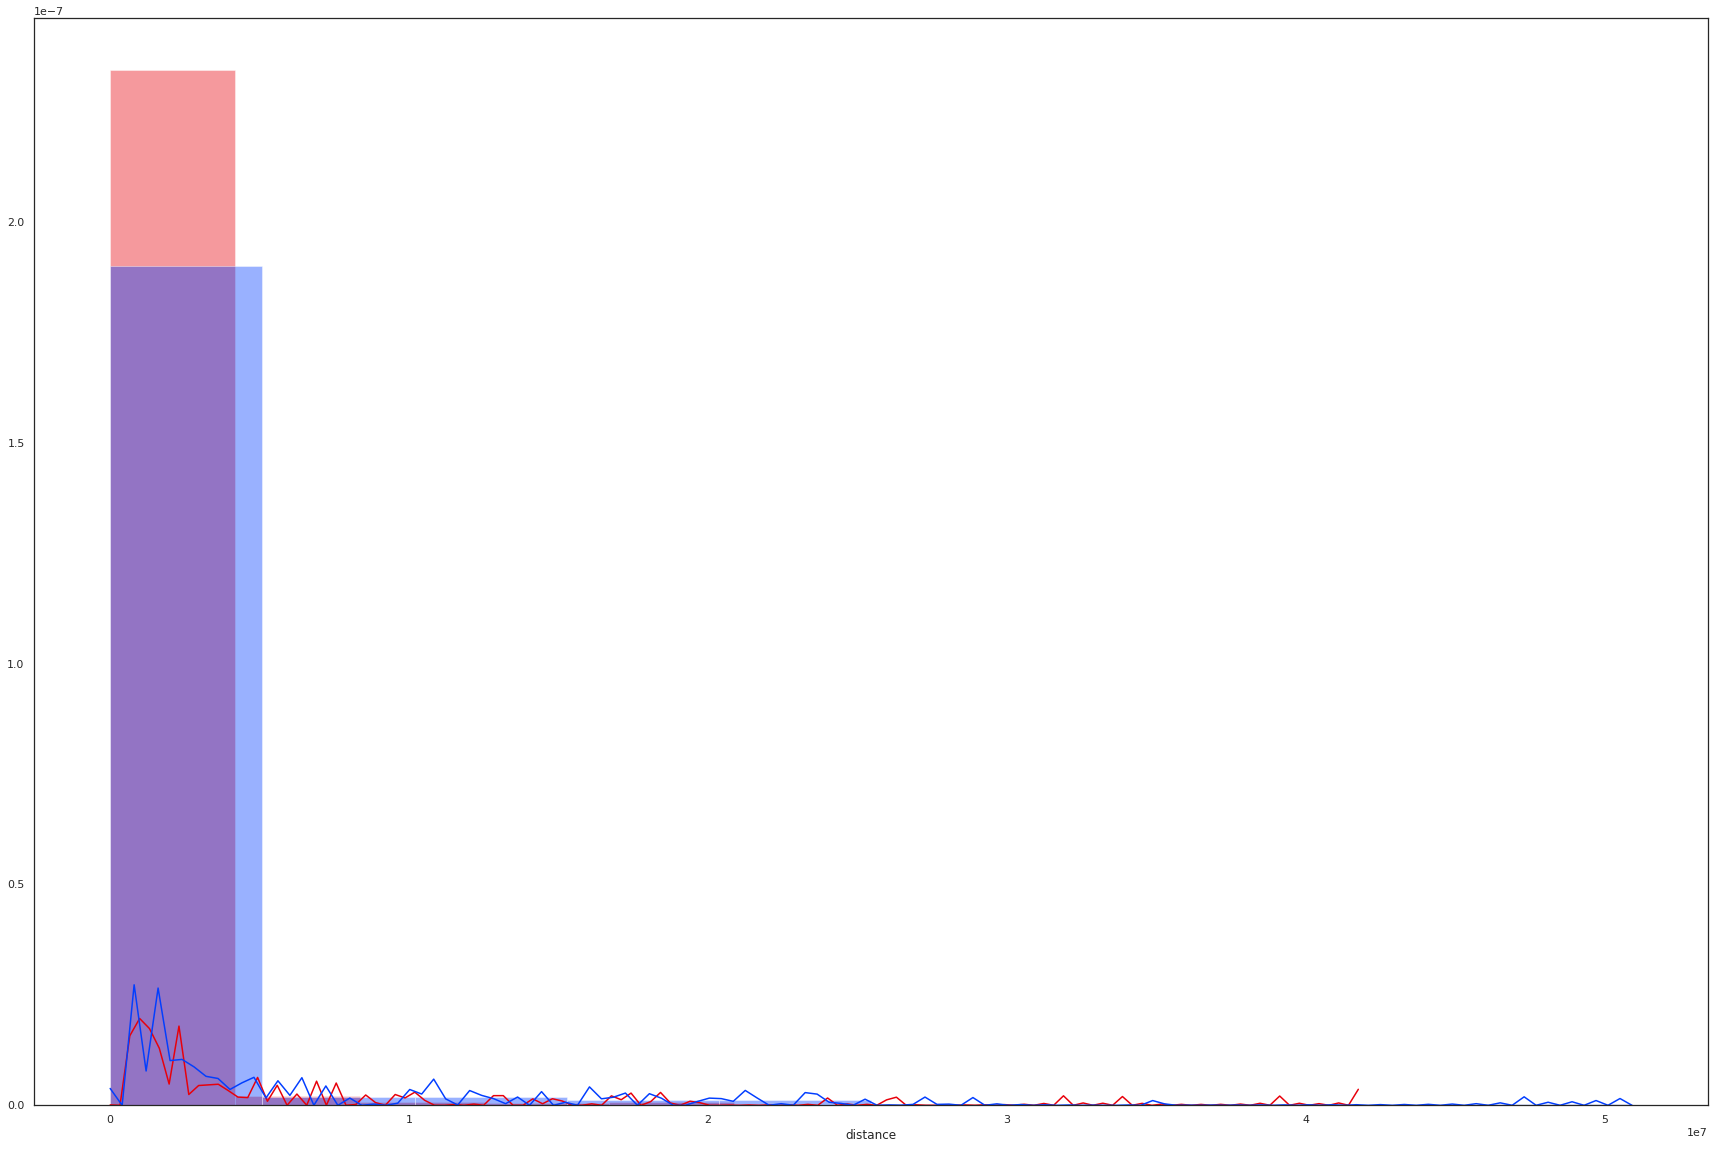

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# With sns.set you can adjust your graph, choose style - dark grid/white,
# color palette, font etc.
sns.set(style="white", palette="bright", color_codes=True)
# If you run both disttribution plots in the same cell, they
# will be plotted in an overlapping manner.
# Enter the column containing distance for each of the strands in a
# variable, choose bins and discerning colors. Plot the 
# distribution plot of both plus and minus strands.
sns.distplot(a=df_pybed_plus["distance"], bins=10, color="r")
sns.distplot(a=df_pybed_minus["distance"], bins=10, color="b")
# Adjust the size of the figure.
plt.gcf().set_size_inches((30, 20))

2. You can plot the plus and the minus strand into separate plots.

A. Unix command option.

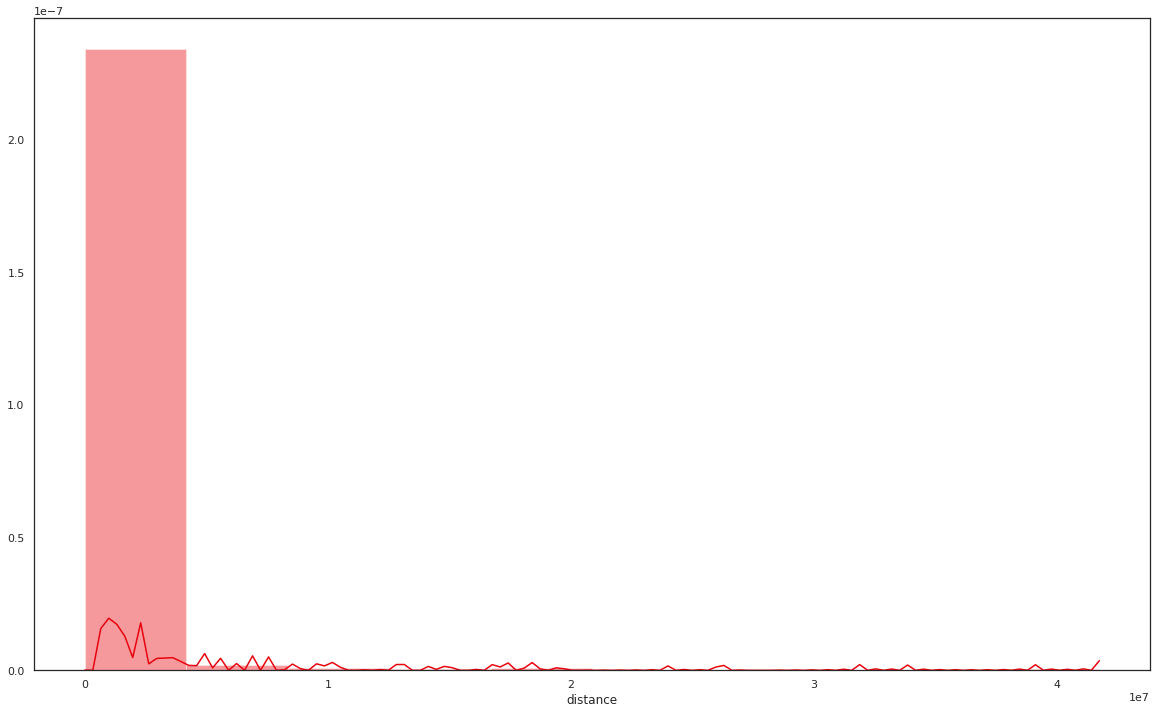

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_unix_plus["distance"], bins=10, color="r")
plt.gcf().set_size_inches((20, 12))

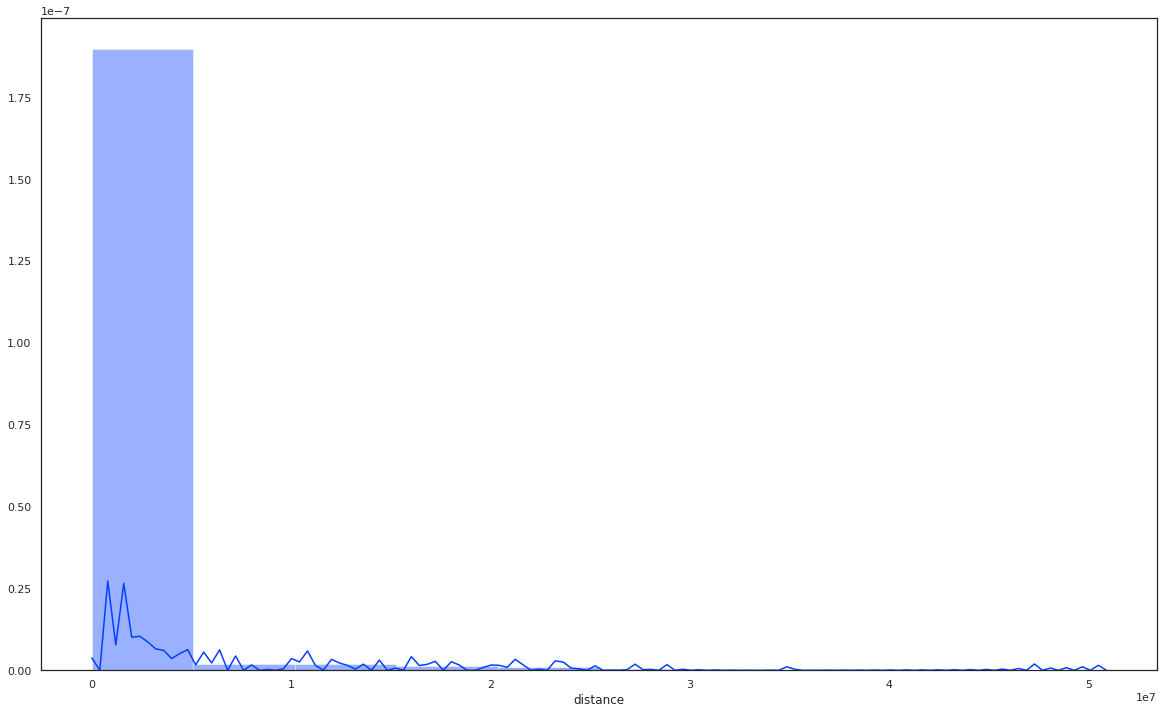

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_unix_minus["distance"], bins=10, color="b")
plt.gcf().set_size_inches((20, 12))

B. Pandas option.

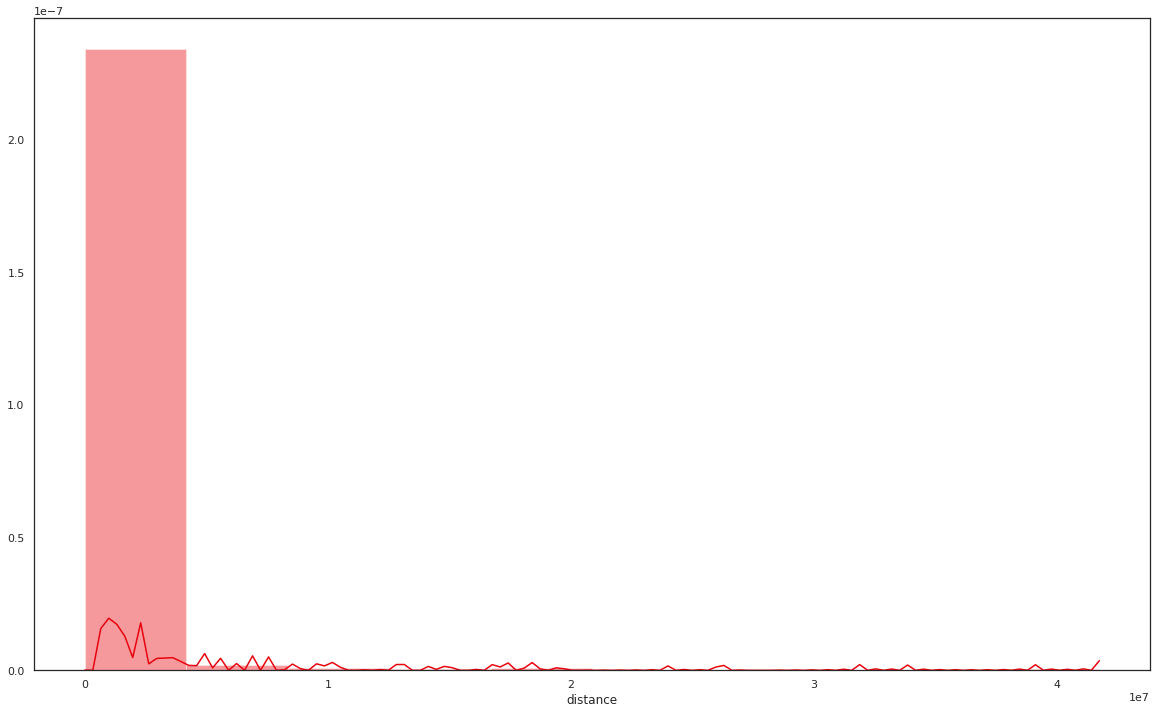

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pandas_plus["distance"], bins=10, color="r")
plt.gcf().set_size_inches((20, 12))

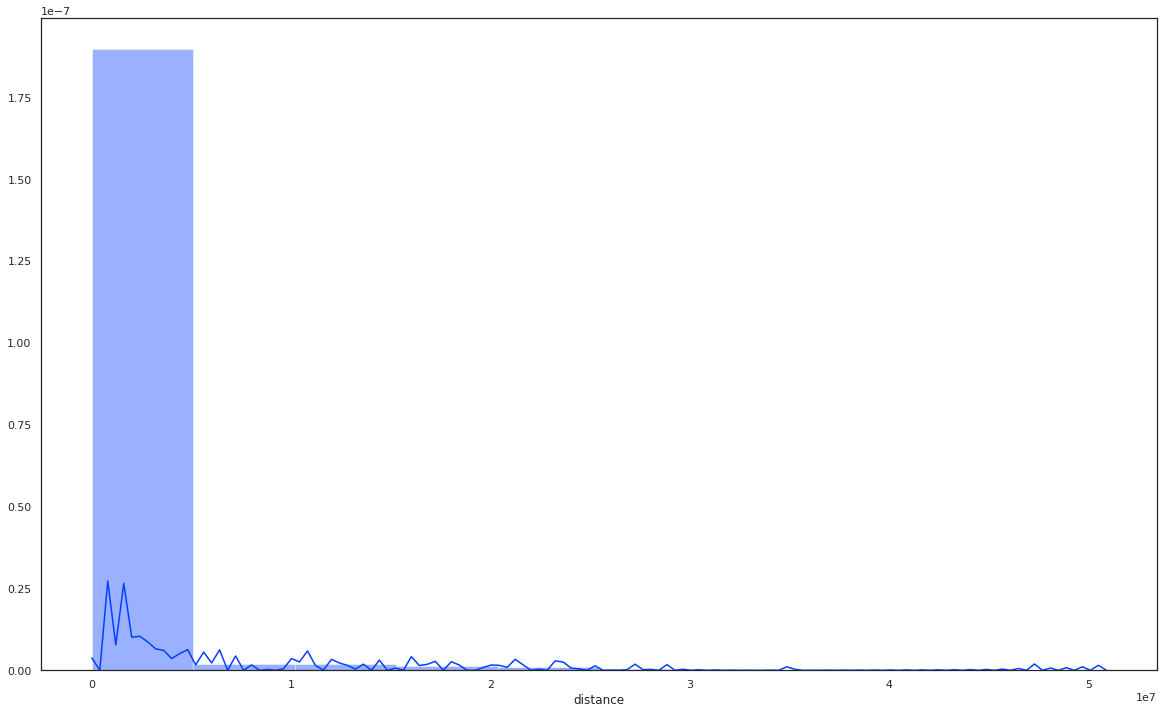

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pandas_minus["distance"], bins=10, color="b")
plt.gcf().set_size_inches((20, 12))

C. Pybedtools option.

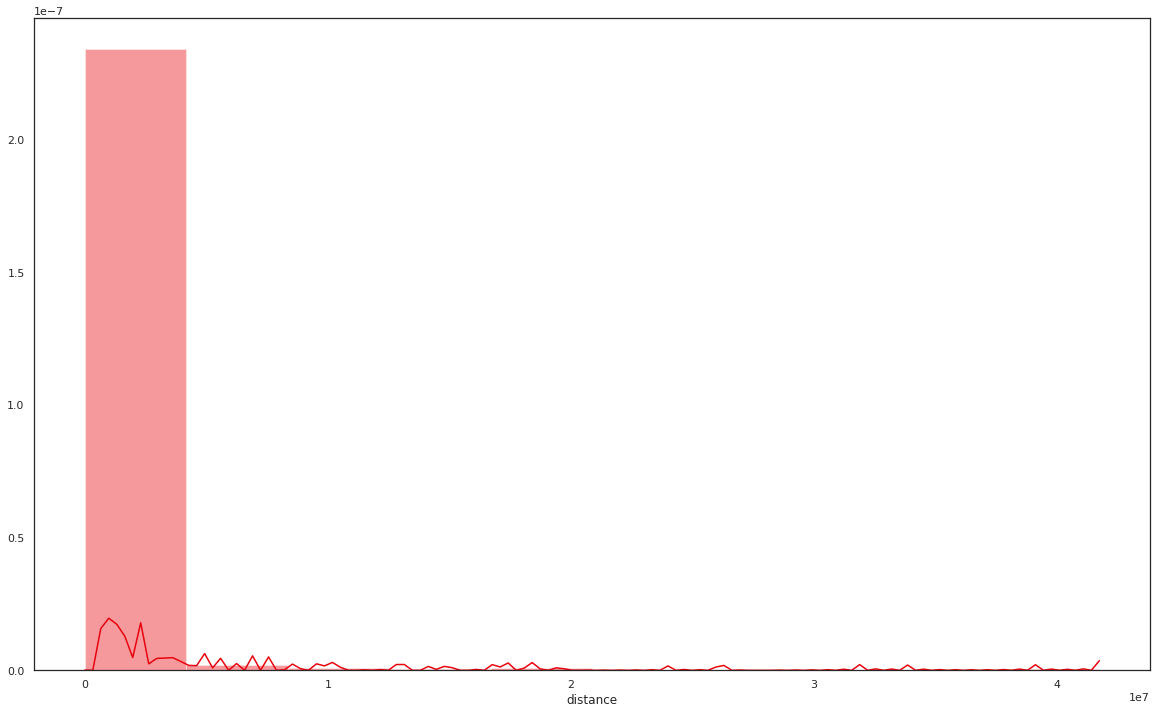

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pybed_plus["distance"], bins=10, color="r")
plt.gcf().set_size_inches((20, 12))

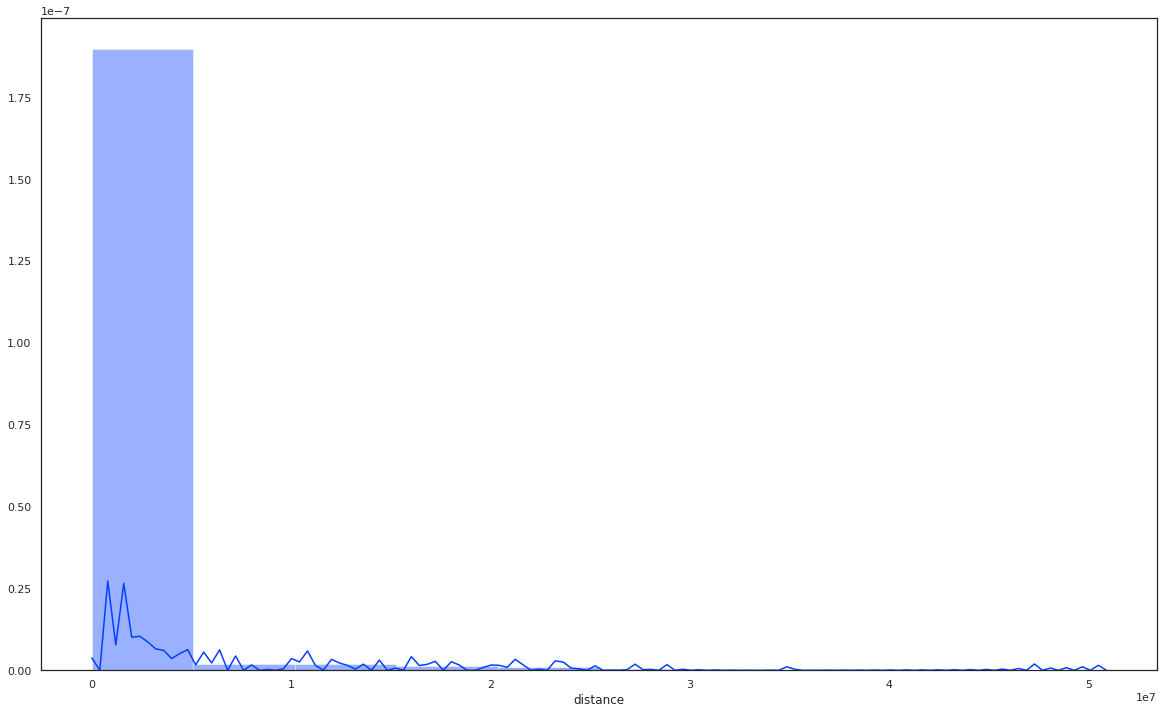

In [0]:
# Plot the distribution plot of the distances on 
# the minus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pybed_minus["distance"], bins=10, color="b")
plt.gcf().set_size_inches((20, 12))

3. You can plot the plus and the minus strand into separate subplots using
distplot.

A. Unix command option.

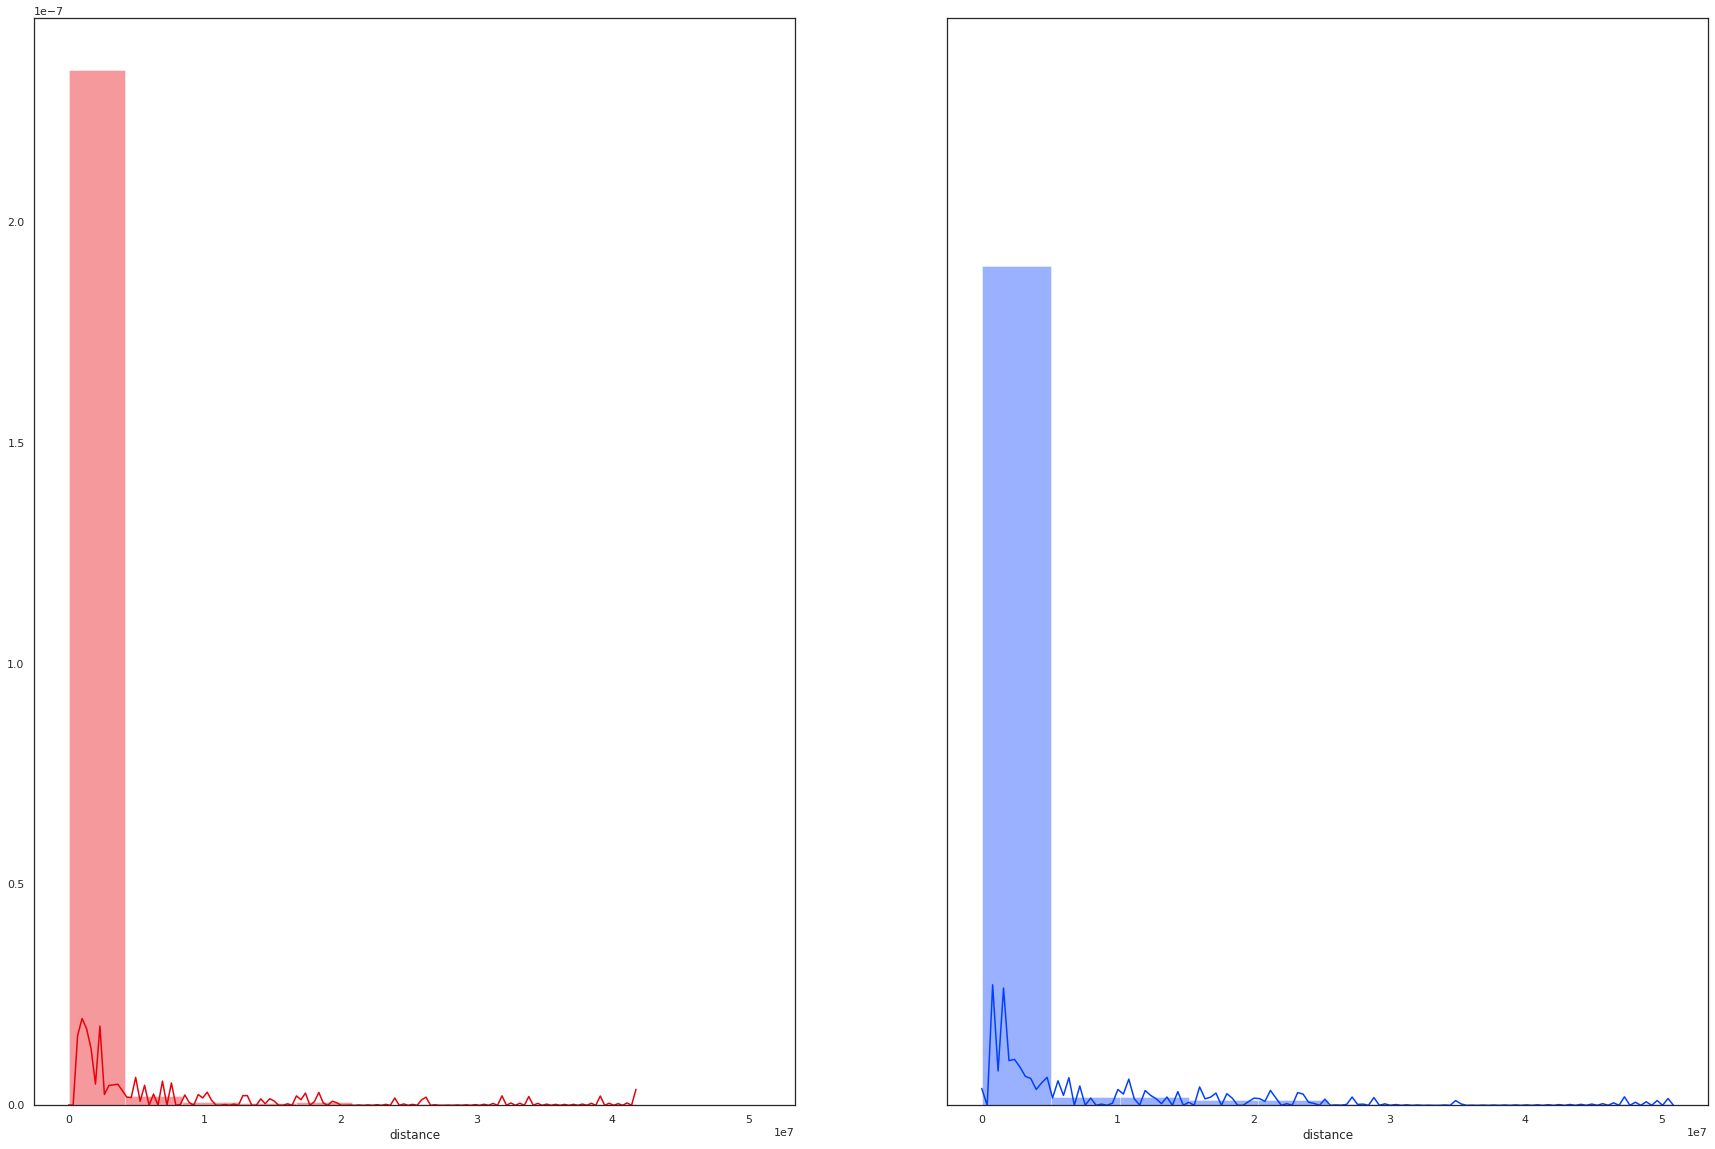

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure. In your case, one row and 
# two columns, share x and y axis to compare them with
# each other. Once the subplots are created, you need to
# fill them with your data in the next step.
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot a distribution plot for the plus strand in the left subplot
# ax=axes[0] and for the minus strand in the right subplot ax=axes[1].
sns.distplot(df_unix_plus["distance"], color="r", ax=axes[0], bins=10)
sns.distplot(df_unix_minus["distance"], color="b", ax=axes[1], bins=10)
plt.gcf().set_size_inches((30, 20))

B. Pandas option.

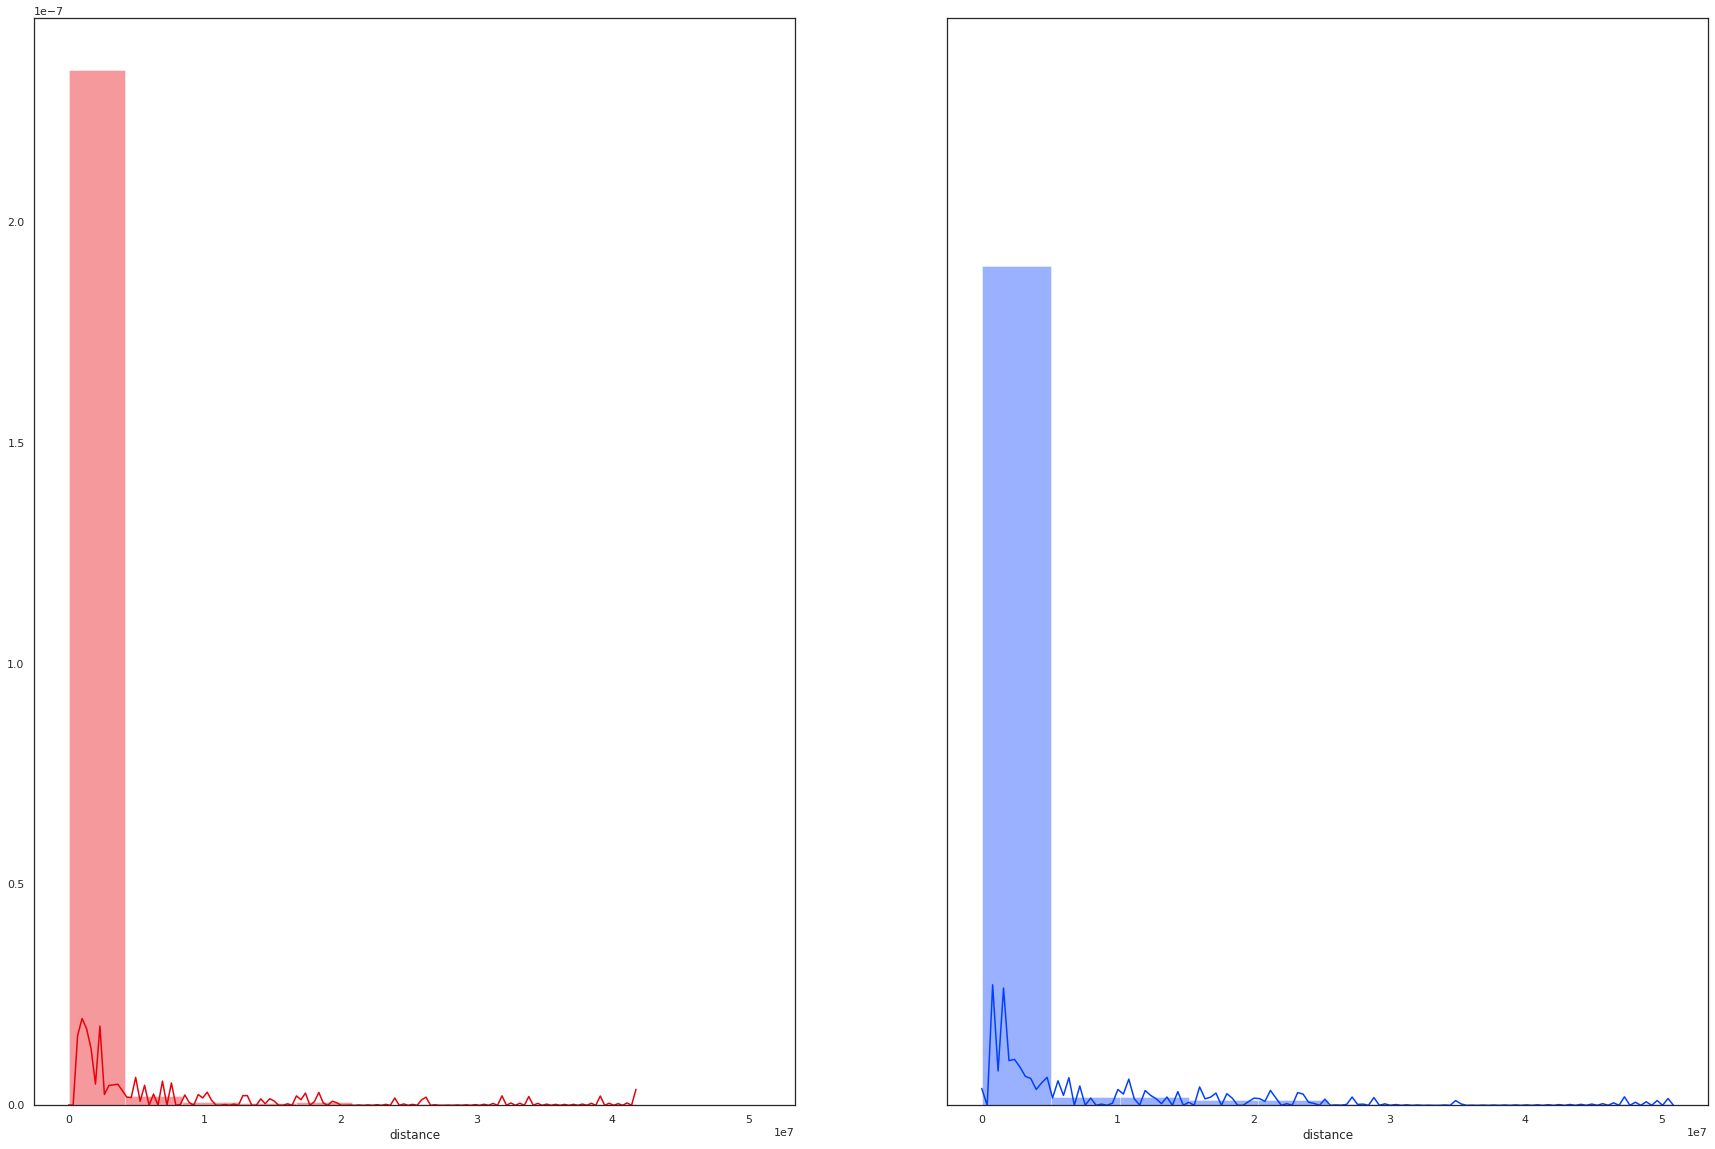

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure. In your case, one row and 
# two columns, share x and y axis to compare them with
# each other. Once the subplots are created, you need to
# fill them with your data in the next step.
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot a distribution plot for the plus strand in the left subplot
# ax=axes[0] and for the minus strand in the right subplot ax=axes[1].
sns.distplot(df_pandas_plus["distance"], color="r", ax=axes[0], bins=10)
sns.distplot(df_pandas_minus["distance"], color="b", ax=axes[1], bins=10)
plt.gcf().set_size_inches((30, 20))

C. Pybedtools option.

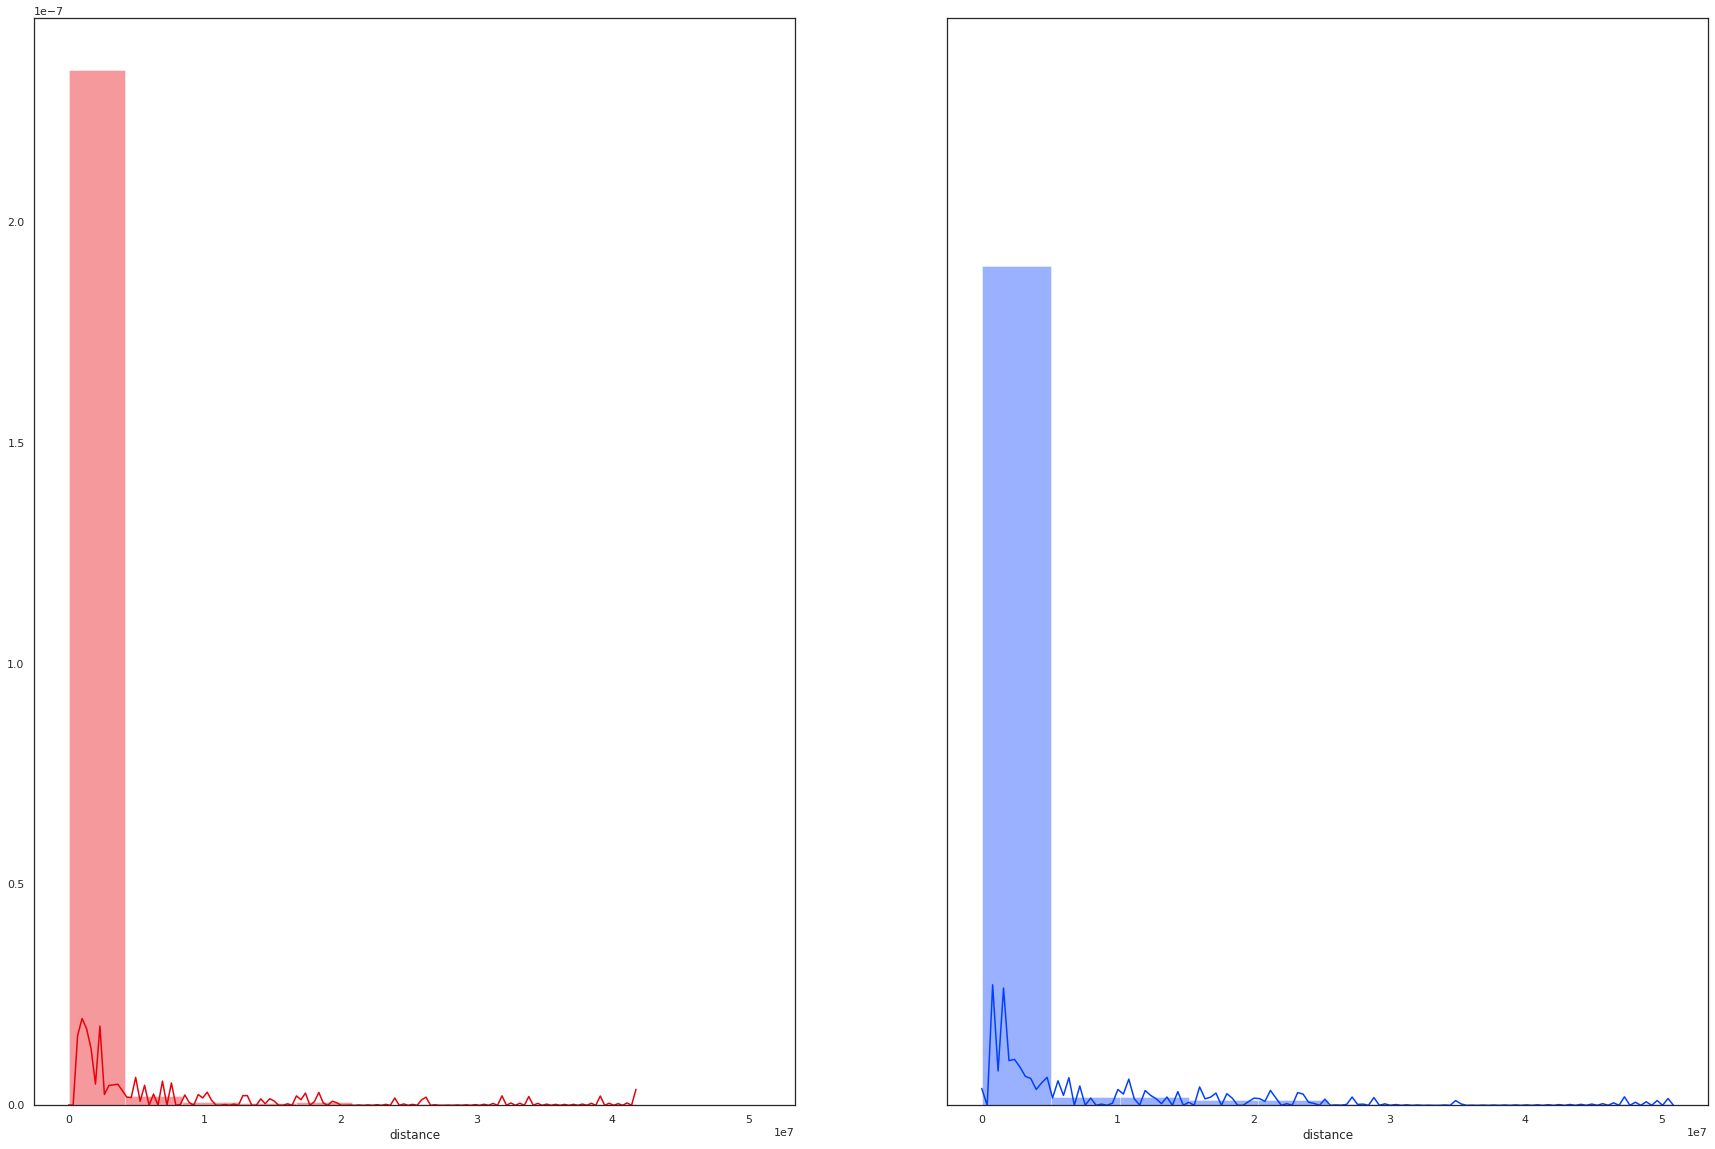

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure. In your case, one row and 
# two columns, share x and y axis to compare them with
# each other. Once the subplots are created, you need to
# fill them with your data in the next step.
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot a distribution plot for the plus strand in the left subplot
# ax=axes[0] and for the minus strand in the right subplot ax=axes[1].
sns.distplot(df_pybed_plus["distance"], color="r", ax=axes[0], bins=10)
sns.distplot(df_pybed_minus["distance"], color="b", ax=axes[1], bins=10)
plt.gcf().set_size_inches((30, 20))

#To find the answer to the inequality of the plus and minus strand graphs, you need to:

I. Count of the rows to estimate how many reads there are for each chromosome on plus and minus strand.

In [0]:
# Count the rows of the plus strand dataframe.
p = df_pandas_plus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Count the rows of the minus strand dataframe.
m = df_pandas_minus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Merge plus and minus dataframe into one.
dataframe_both = p.merge(m, on='chromosome', suffixes=('_plus','_minus'))

II. The mean distance between chromosome reads on plus and minus strand.

In [0]:
# Determine the mean value of each of the plus strand distances for each chromosome.
table_plus = pd.pivot_table(df_pandas_plus,index=['chromosome','strand'],values=["distance"],aggfunc="first")
print(table_plus)
pd.pivot_table(table_plus,index=['chromosome', 'strand'],values=["distance"],aggfunc=np.mean)

                   distance
chromosome strand          
chr1       +          70103
chr10      +           1741
chr11      +            828
chr12      +            804
chr13      +             39
chr14      +            349
chr15      +            343
chr16      +          39465
chr17      +             79
chr18      +            162
chr19      +            341
chr2       +         405486
chr20      +         373455
chr21      +            183
chr22      +           5597
chr3       +         123921
chr4       +            116
chr5       +          17037
chr6       +            493
chr7       +            132
chr8       +        1280366
chr9       +        3393000
chrX       +            161


,,distance
chromosome,strand,
chr1,+,70103
chr10,+,1741
chr11,+,828
chr12,+,804
chr13,+,39
chr14,+,349
chr15,+,343
chr16,+,39465
chr17,+,79


In [0]:
# Determine the mean value of each of the minus strand distances for each chromosome.
table_minus = pd.pivot_table(df_pandas_minus,index=['chromosome','strand'],values=["distance"],aggfunc="first")
print(table_minus)
pd.pivot_table(table_minus,index=['chromosome', 'strand'],values=["distance"],aggfunc=np.mean)

                                distance
chromosome              strand          
chr1                    -         106742
chr10                   -        6478554
chr11                   -            545
chr12                   -            141
chr13                   -       18239735
chr14                   -          74626
chr14_GL000194v1_random -            277
chr15                   -             67
chr16                   -           8212
chr17                   -         176224
chr18                   -          12299
chr19                   -         214709
chr2                    -           3533
chr20                   -            496
chr21                   -       24157498
chr22                   -         144807
chr3                    -            499
chr4                    -            976
chr5                    -            138
chr6                    -        4867713
chr7                    -           1272
chr8                    -         130169
chr9            

,,distance
chromosome,strand,
chr1,-,106742
chr10,-,6478554
chr11,-,545
chr12,-,141
chr13,-,18239735
chr14,-,74626
chr14_GL000194v1_random,-,277
chr15,-,67
chr16,-,8212


In [0]:
# Merge plus and minus table into one.
table_both = table_plus.merge(table_minus, on='chromosome', suffixes=('_plus','_minus'))

III. Merge the table with reads count and the table with mean distances.

In [0]:
# Merge the plus and minus reads count table together with mean distances.
table_all_info = dataframe_both.merge(table_both, on='chromosome', suffixes=(' ',''))
table_all_info.columns=['+', '-', '+_average', '-_average']
print(table_all_info)

              +    -  +_average  -_average
chromosome                                
chr1        170  173      70103     106742
chr10        48   93       1741    6478554
chr11       202  106        828        545
chr12        45   45        804        141
chr13        37    6         39   18239735
chr14        33   32        349      74626
chr15        36   31        343         67
chr16       317  251      39465       8212
chr17        68   96         79     176224
chr18         6    2        162      12299
chr19       464  165        341     214709
chr2        137   74     405486       3533
chr20        40  102     373455        496
chr21        78   33        183   24157498
chr22       167  362       5597     144807
chr3         61   47     123921        499
chr4         39  100        116        976
chr5         65   52      17037        138
chr6         49   21        493    4867713
chr7        101  111        132       1272
chr8         36   48    1280366     130169
chr9       

IV. Plot the obtained data into distplot.

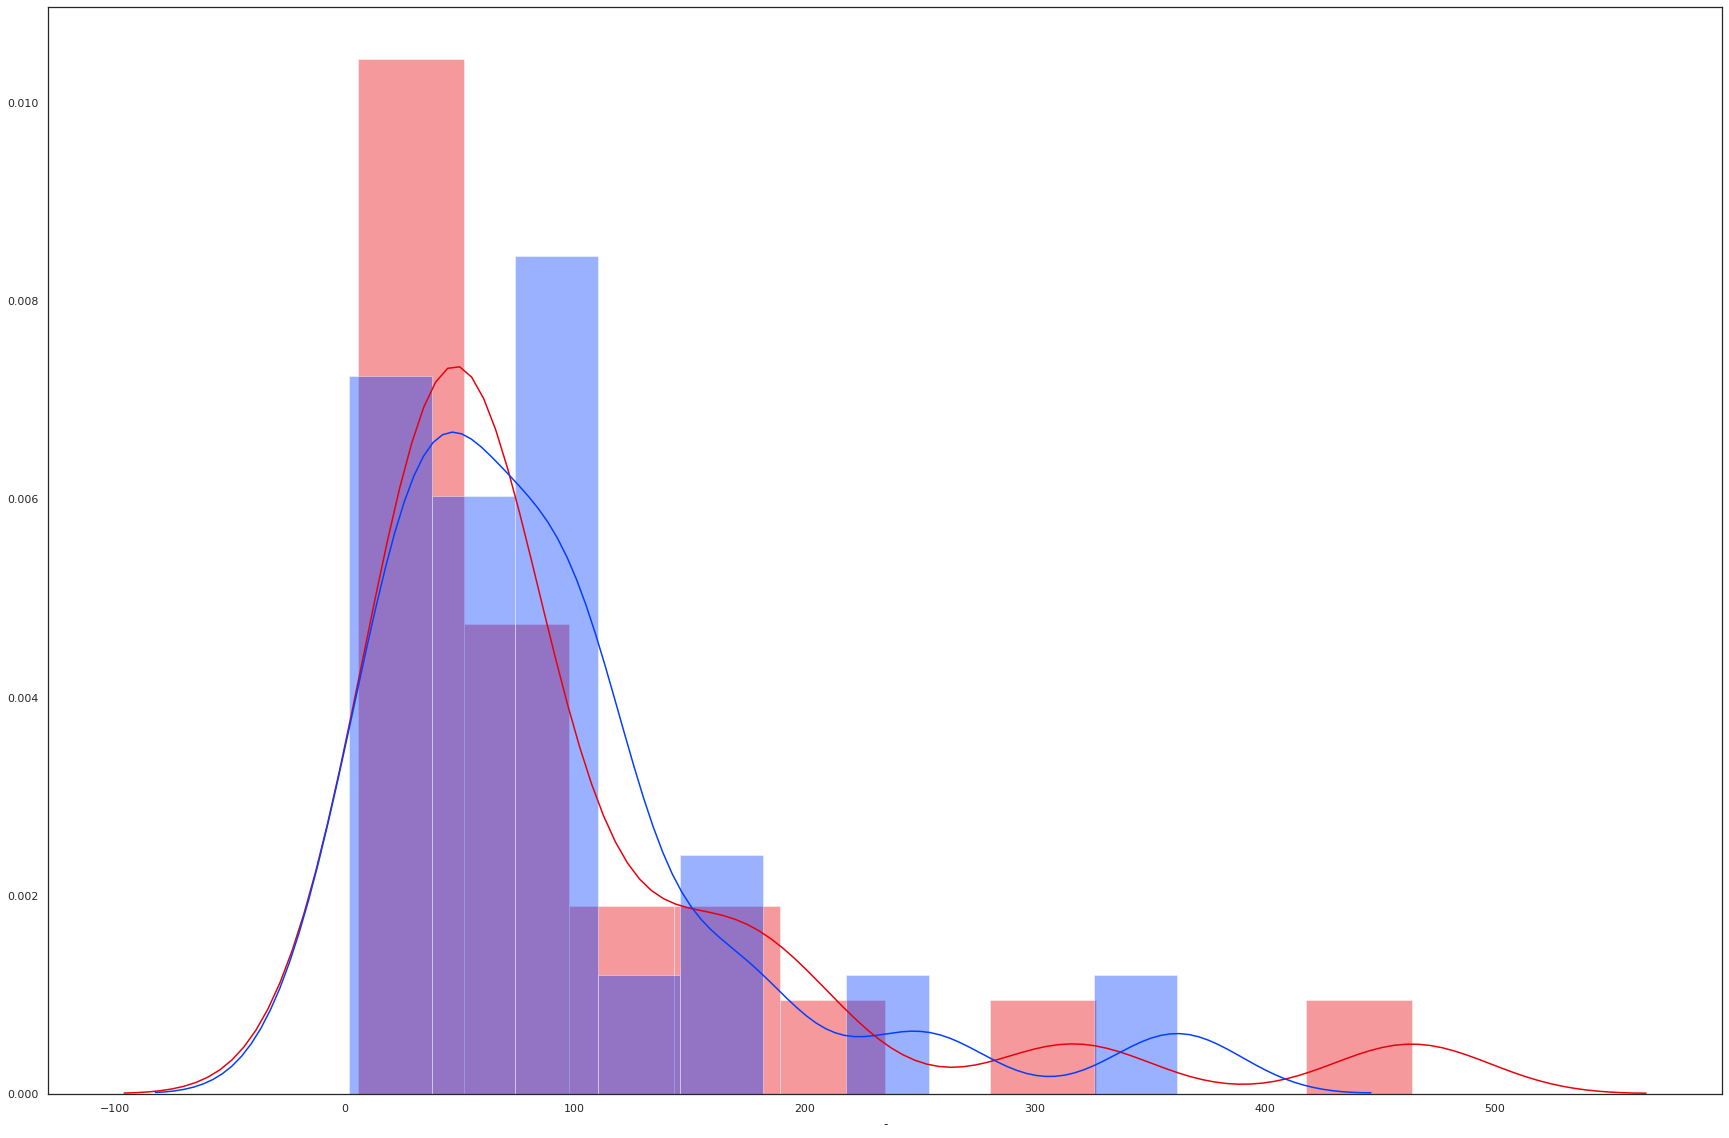

In [0]:
# Plot the plus and minus reads count table into distplot.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=table_all_info["+"], bins=10, color="r")
sns.distplot(a=table_all_info["-"], bins=10, color="b")

plt.gcf().set_size_inches((30, 20))

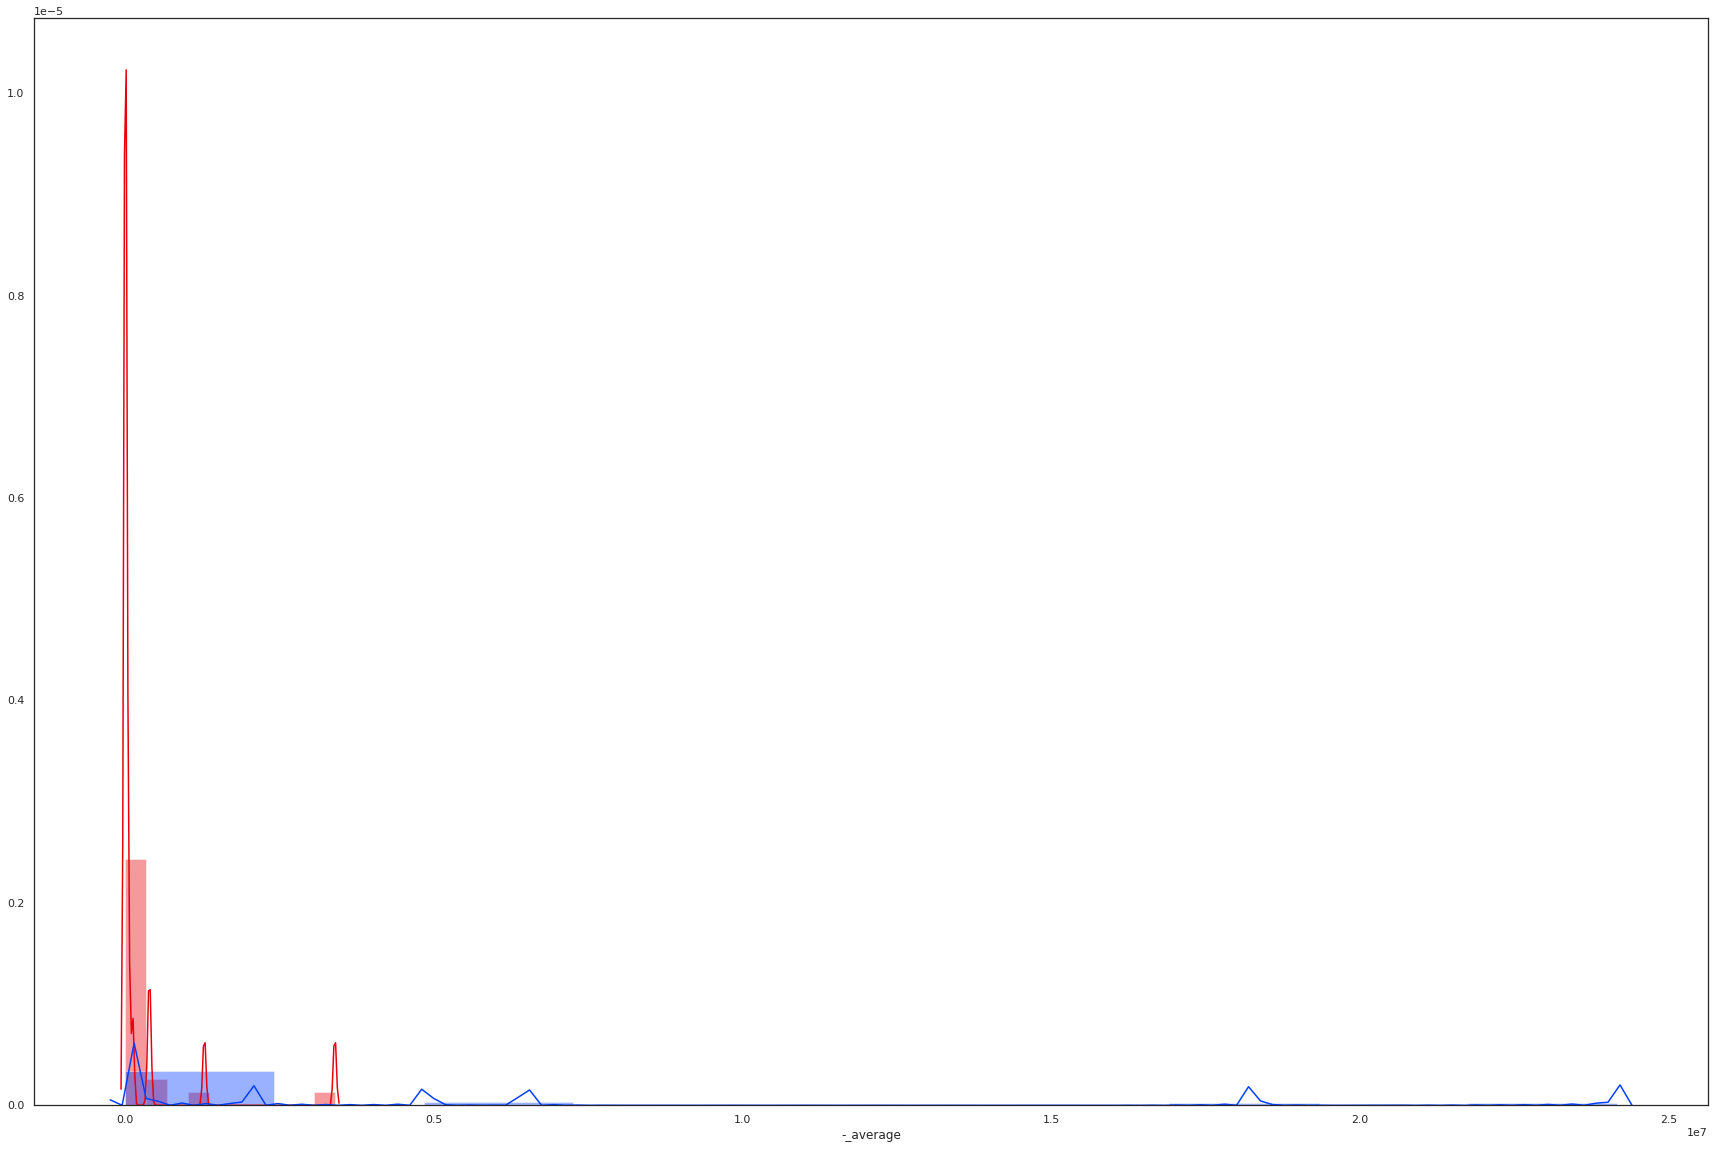

In [0]:
# Plot the plus and minus average distances into distplot.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=table_all_info["+_average"], bins=10, color="r")
sns.distplot(a=table_all_info["-_average"], bins=10, color="b")

plt.gcf().set_size_inches((30, 20))

#Shuffled distribution plot.

I. Download the BED file. You can use the BED reader function from the Python package.

In [0]:
# Import get and decompress functions which you will need for the BED reader function.
from requests import get
from gzip import decompress

# Define a function that will download the compressed (gz) BED file,
# and it will decompress it to text.
# Helper function get_gzipped_bed_ is inside the main bed_reader function.
def bed_reader(target_url, output_name):
  def get_gzipped_bed_(target_url):
    downloaded_bed = get(target_url).content
    decompressed_bed = decompress(downloaded_bed)
    return decompressed_bed
  decompressed = get_gzipped_bed_(target_url)
  bed_file_human_readable = decompressed.decode()
  # Write bed file to new file on the disk
  output_file = open(output_name, "w")
  output_file.write(bed_file_human_readable)
  output_file.close()
  return output_name

# Call the outer function and provide it with two arguments - url and arbitrary 
# output name.
bed_reader("https://www.encodeproject.org/files/ENCFF861KMV/@@download/ENCFF861KMV.bed.gz", 
           "ENCFF861KMV.bed")

'ENCFF861KMV.bed'

II. Create a shuffled BED file by shuffling chromosomes FUS gene from Homo sapiens K562 with shuffled chromosomes from hg19 genome from Homo Sapiens.

In [0]:
bedfile = pybedtools.bedtool.BedTool('ENCFF861KMV.bed')
seed = 13 # Seed is arbitrary but keep always the same number for
# the reproducibility of the experiment.
shuffled_bedfile = bedfile.shuffle(genome='hg19', chrom=True, seed=seed)
print(shuffled_bedfile) 

chr9	87670011	87670195	FUS_K562_IDR	1000	+	3.22595440618123	6.78083477816966	-1	-1
chr3	139117091	139117191	FUS_K562_IDR	1000	+	5.07968689911725	10.2944552008675	-1	-1
chr8	38828993	38829064	FUS_K562_IDR	1000	-	4.68211356648989	6.00970555387156	-1	-1
chr9	138033560	138033607	FUS_K562_IDR	1000	+	4.759894022919	5.21368855929513	-1	-1
chr5	40041944	40042011	FUS_K562_IDR	1000	-	4.85893204379723	9.12583076645567	-1	-1
chr7	81793372	81793492	FUS_K562_IDR	1000	-	4.20308019513676	3.76950254253895	-1	-1
chr16	63576173	63576230	FUS_K562_IDR	1000	+	3.91872285167357	3.85604077765274	-1	-1
chr16	80492921	80493032	FUS_K562_IDR	1000	+	3.38067136213068	4.36642136879681	-1	-1
chr10	95809871	95809952	FUS_K562_IDR	1000	+	4.29577930206388	12.9874626684996	-1	-1
chr10	109862075	109862143	FUS_K562_IDR	1000	+	3.38337135600197	8.09657898965223	-1	-1
chr11	25848610	25848680	FUS_K562_IDR	1000	+	3.88329649247428	4.17975485045328	-1	-1
chr5	114174379	114174427	FUS_K562_IDR	1000	+	3.25476778692541	3.57622313657196

III. Sort shuffled BED file.

In [0]:
shuffled_sorted = shuffled_bedfile.sort()
print(shuffled_sorted)

chr1	1566746	1566833	FUS_K562_IDR	1000	+	3.04163540957435	7.94385773794095	-1	-1
chr1	1713936	1714028	FUS_K562_IDR	1000	-	3.27744592339696	3.83337927656262	-1	-1
chr1	2113308	2113408	FUS_K562_IDR	1000	-	3.49218953108161	4.92631426877663	-1	-1
chr1	2251261	2251400	FUS_K562_IDR	1000	+	3.12362327712992	3.53719425627146	-1	-1
chr1	2569643	2569756	FUS_K562_IDR	1000	+	3.27982625335797	4.93485591844653	-1	-1
chr1	3074842	3074987	FUS_K562_IDR	1000	+	4.00716173271561	3.85604077765274	-1	-1
chr1	3382407	3382526	FUS_K562_IDR	1000	-	4.05392822871349	9.51380267162066	-1	-1
chr1	4043491	4043660	FUS_K562_IDR	1000	-	4.28563579499139	5.60873170854864	-1	-1
chr1	5439214	5439326	FUS_K562_IDR	1000	+	3.21167914157746	4.35774872221712	-1	-1
chr1	5507698	5507764	FUS_K562_IDR	1000	+	3.04403590270626	5.33325519725987	-1	-1
chr1	5534179	5534252	FUS_K562_IDR	1000	-	4.47459481685046	6.00970555387156	-1	-1
chr1	6596365	6596442	FUS_K562_IDR	1000	-	3.57424922096217	5.89619114961195	-1	-1
chr1	6956277	6956353	FUS_K56

IV. Create a dictionary with shuffled reads separated into those on the plus and those on the minus strand.

In [0]:
# Create an empty dictionary. 
dict_r_shuffled_pybed = {}
# Open sorted BED file.
with open(shuffled_sorted.fn, "r") as text:
  # Read the content line by line.
  for line in text.readlines():
    # Define column, chrom_name, start, end, and strand.
    column = line.strip().split("\t")
    chrom_name = column[0]
    start = int(column[1])
    end = int(column[2])
    strand = column[5]
    # If the chromosome name exists in the dictionary already,
    # put the strand inside without creating a new dictionary
    # with the same chromosome name.
    if chrom_name in dict_r_shuffled_pybed:
      # If the dictionary strand already exists in the dictionary 
      # chromosome name, put the end/start inside without creating
      # a new strand key.
      if strand in dict_r_shuffled_pybed[chrom_name]:
        # In case of the plus strand, append end coordinate to the list where 
        #the 5' end (head) occurs.
        if strand == "+":
          dict_r_shuffled_pybed[chrom_name][strand].append(start) 
        # If the strand is minus, append start to the list,
        # the reason being that minus strand is in reversed
        # order - start coordinate presents the 5' end (head).
        else:
          dict_r_shuffled_pybed[chrom_name][strand].append(end)
      # If the strand does not yet exist in
      # the chromosome name dictionary, it is
      # created and a list is created inside.
      else:
        dict_r_shuffled_pybed[chrom_name][strand] = []
        # To fill the new strand dictionary,
        # you need to provide also the code for strand dictionary
        # creation, the +/- keey, and the end/start coordinates
        # inside the list.
        if strand == "+":
          dict_r_shuffled_pybed[chrom_name][strand].append(start) 
        else:
          dict_r_shuffled_pybed[chrom_name][strand].append(end)
    # If the chromosome name is not yet in the dictionary, 
    #create it.
    else:
      # Create a new dictionary inside the chromosome name
      # dictionary.
      dict_r_shuffled_pybed[chrom_name] = {}
      # To fill the new "chrom_name" dictionary, you need to 
      # provide also the code for strand dictionary
      # creation, the +/- key, and the end/start coordinates
      # inside the list.
      # The key of this dictionary is strand and the value
      # is a new list.
      dict_r_shuffled_pybed[chrom_name][strand] = []
      # If the strand is plus, append end to the list.
      if strand == "+":
        dict_r_shuffled_pybed[chrom_name][strand].append(start) 
      # If the strand is minus, append start to the list.
      else:
        dict_r_shuffled_pybed[chrom_name][strand].append(end)
print(dict_r_shuffled_pybed)

{'chr1': {'+': [1566746, 2251261, 2569643, 3074842, 5439214, 5507698, 6956277, 11506520, 11628038, 11961601, 12847056, 14439175, 14899516, 17341126, 17651255, 17868584, 17949786, 19150434, 19858589, 20062481, 22039382, 22133122, 22870541, 23845890, 26132437, 26388467, 28180773, 28828961, 32580662, 33185279, 34813476, 34895355, 37324629, 38442533, 40388203, 41333795, 42149463, 45155419, 45715425, 47838178, 47860409, 48412893, 53313444, 53445646, 54405578, 55071850, 55254378, 58985038, 67415502, 68001235, 68996884, 69521078, 70142160, 70160441, 70584559, 71458832, 71711355, 76673430, 79484142, 81754738, 82312241, 85442160, 85673436, 85846000, 87450572, 88171641, 88384961, 88487617, 89035478, 92098400, 93233325, 93652156, 93940433, 94995169, 95117837, 95774921, 97060740, 97190235, 97299495, 97340894, 98513106, 98597845, 100178144, 100671987, 101576087, 101978045, 105212562, 108232748, 109797023, 109824262, 110284094, 111205831, 113722626, 113966382, 114756850, 116594575, 118659064, 119489

V. Create a dictionary with the shuffled chromosomes and the smallest head to head distance.

In [0]:
# Create an empty dictionary. 
dict_dis_shuffled_pybed = {}
# For each chromosome in the dictionary of reads create a chrom_name in the new 
# dictionary of distance. Simultaneously, the lists for the plus and for the minus 
# strand will be created. Note: You need to define chrom_name variable again, 
# because it is not defined here yet - "for chrom_name".
for chrom_name in dict_r_shuffled_pybed:
  dict_dis_shuffled_pybed[chrom_name] = {"+" : list(), "-" : list()}
  # Sort the plus and the minus strand into the corresponding list in the same manner 
  # as in the III. 
  for strand in dict_r_shuffled_pybed[chrom_name]:
    if strand == "+":
      # Once the for loop reaches the end of the dictionary, the error occurs
      # because e + 1 is no more possible. This can be avoided by "try"
      # and "except IndexError".
      try:
        # For index in the range from 0 to the last of the reads on the minus
        # strand in the dictionary of reads.
        for s in range(0,len(dict_r_shuffled_pybed[chrom_name][strand])): 
          # Subtract the left start (index) from the right start (index + 1).
          # Append the obtained distance to the minus strand. Carry on till the
          # end of the dictionary.
          right_start = dict_r_shuffled_pybed[chrom_name][strand][s+1]          
          left_start = dict_r_shuffled_pybed[chrom_name][strand][s]        
          distance = right_start - left_start
          dict_dis_shuffled_pybed[chrom_name][strand].append(distance)
      except IndexError:
        "null"
    else:
      try:
        # For index in the range from 0 to the last of the reads on the plus
        # strand in the dictionary of reads.
        for e in range(0,len(dict_r_shuffled_pybed[chrom_name][strand])):
          # Subtract the left end (index) from the right end (index + 1).
          # Append the obtained distance to the plus strand. Carry on till the
          # end of the dictionary.
          right_end = dict_r_shuffled_pybed[chrom_name][strand][e+1]          
          left_end = dict_r_shuffled_pybed[chrom_name][strand][e]        
          distance = right_end - left_end 
          dict_dis_shuffled_pybed[chrom_name][strand].append(distance)
      except IndexError:
        "null"
        
print(dict_r_shuffled_pybed) # Printing the dictionary with reads.
print(dict_dis_shuffled_pybed) # Printing the dictionary with the closest distance.

{'chr1': {'+': [1566746, 2251261, 2569643, 3074842, 5439214, 5507698, 6956277, 11506520, 11628038, 11961601, 12847056, 14439175, 14899516, 17341126, 17651255, 17868584, 17949786, 19150434, 19858589, 20062481, 22039382, 22133122, 22870541, 23845890, 26132437, 26388467, 28180773, 28828961, 32580662, 33185279, 34813476, 34895355, 37324629, 38442533, 40388203, 41333795, 42149463, 45155419, 45715425, 47838178, 47860409, 48412893, 53313444, 53445646, 54405578, 55071850, 55254378, 58985038, 67415502, 68001235, 68996884, 69521078, 70142160, 70160441, 70584559, 71458832, 71711355, 76673430, 79484142, 81754738, 82312241, 85442160, 85673436, 85846000, 87450572, 88171641, 88384961, 88487617, 89035478, 92098400, 93233325, 93652156, 93940433, 94995169, 95117837, 95774921, 97060740, 97190235, 97299495, 97340894, 98513106, 98597845, 100178144, 100671987, 101576087, 101978045, 105212562, 108232748, 109797023, 109824262, 110284094, 111205831, 113722626, 113966382, 114756850, 116594575, 118659064, 119489

VI. Create a dictionary with the closest distances without outliers.

In [0]:
dict_clos_shuffled_pybed = {}
# For each chromosome in the dictionary of distance create a chrom_name in the new
# dictionary of the closest distances. Simultaneously, the lists for the plus
# and for the minus strand will be created as explained above.
for chrom_name in dict_dis_shuffled_pybed:
  dict_clos_shuffled_pybed[chrom_name] = {"+" : list(), "-" : list()}
  for strand in dict_dis_shuffled_pybed[chrom_name]:
    if strand == "+":
      try:
        for dist_start in range(0,len(dict_dis_shuffled_pybed[chrom_name][strand])):
          # This time, you need to compare the distance between the current
          # position and the next one with the distance between the current
          # position and the previous one. Whichever is closer will be put
          # to the dictionary.
          this_start_pos = dict_dis_shuffled_pybed[chrom_name][strand][dist_start]
          right_start_neigh = dict_dis_shuffled_pybed[chrom_name][strand][dist_start+1]          
          left_start_neigh = dict_dis_shuffled_pybed[chrom_name][strand][dist_start-1]    
          dist1 = this_start_pos - left_start_neigh 
          dist1 = abs(dist1)    
          dist2 = right_start_neigh - this_start_pos    
          dist2 = abs(dist2)  
          if dist1 < dist2:
            dict_clos_shuffled_pybed[chrom_name][strand].append(left_start_neigh)
          else:
            dict_clos_shuffled_pybed[chrom_name][strand].append(right_start_neigh)
      except IndexError:
        "null" 
      
    else:
      try:
        for dist_end in range(0,len(dict_dis_shuffled_pybed[chrom_name][strand])): 
          this_end_pos = dict_dis_shuffled_pybed[chrom_name][strand][dist_end]
          right_end_neigh = dict_dis_shuffled_pybed[chrom_name][strand][dist_end+1]          
          left_end_neigh = dict_dis_shuffled_pybed[chrom_name][strand][dist_end-1]    
          dist1 = this_end_pos - left_end_neigh    
          dist1 = abs(dist1)    
          dist2 = right_end_neigh - this_end_pos    
          dist2 = abs(dist2)           
          if dist1 < dist2:
            dict_clos_shuffled_pybed[chrom_name][strand].append(left_end_neigh)
          else:
            dict_clos_shuffled_pybed[chrom_name][strand].append(right_end_neigh)
      except IndexError:
        "null" 
print(dict_clos_shuffled_pybed)

{'chr1': {'+': [318382, 505199, 318382, 505199, 1448579, 68484, 1448579, 333563, 121518, 333563, 885455, 1592119, 460341, 217329, 310129, 217329, 708155, 1200648, 708155, 203892, 737419, 975349, 737419, 975349, 1792306, 648188, 1792306, 648188, 1628197, 604617, 1628197, 1117904, 1945670, 1117904, 815668, 945592, 815668, 2122753, 560006, 552484, 22231, 552484, 959932, 666272, 959932, 666272, 182528, 3730660, 995649, 585733, 621082, 524194, 424118, 18281, 424118, 874273, 2810712, 2270596, 2810712, 2270596, 557503, 172564, 231276, 721069, 213320, 102656, 213320, 102656, 1134925, 418831, 288277, 418831, 288277, 657084, 122668, 657084, 109260, 129495, 109260, 84739, 1172212, 493843, 904100, 493843, 904100, 3020186, 3234517, 3020186, 459832, 27239, 459832, 921737, 790468, 243756, 2064489, 1837725, 815847, 830106, 815847, 924185, 215351, 1095368, 1981087, 1239262, 1486011, 1239262, 86060, 733824, 726730, 1130063, 726730, 1130063, 15705, 2379535, 1578866, 2301917, 1578866, 367223, 989370, 3672

VII. Plot the distribution plot.

1) To plot the data from the dictionary, you need to convert the dictionary into
dataframe. 

In [0]:
import pandas as pd

# Create an empty list.
list_pybed_shuffled_plus = list()
list_pybed_shuffled_min = list()
# Loop over the chromosome names in the dictionary. 
for chrom_name in dict_clos_shuffled_pybed:
  # Create a temporary dictionary with the strands.
  dict_clos_pybed_shuffled_tmp = dict_clos_shuffled_pybed[chrom_name]
  # Loop over strands in the temporary dictionary.
  for strand in dict_clos_pybed_shuffled_tmp:
    if strand == "+":
    # Define the distance.
      distance = dict_clos_pybed_shuffled_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_shuffled_plus = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_shuffled_plus["strand"] = strand
      dict_pybed_shuffled_plus["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_shuffled_plus.append(dict_pybed_shuffled_plus)
    else:
      distance = dict_clos_pybed_shuffled_tmp[strand]
    # Create a pandas daraframe with following columns:
    # distance, strand, and chromosome. 
      dict_pybed_shuffled_min = pd.DataFrame(distance, columns=["distance"])
      dict_pybed_shuffled_min["strand"] = strand 
      dict_pybed_shuffled_min["chromosome"] = chrom_name
    # Append all of the dataframes from the temporary dictionary
    # to the list.
      list_pybed_shuffled_min.append(dict_pybed_shuffled_min)

# You need to concatenate the list of dataframes into a new dataframe.    
df_pybed_shuffled_plus = pd.concat(list_pybed_shuffled_plus)
df_pybed_shuffled_minus = pd.concat(list_pybed_shuffled_min)
print(df_pybed_shuffled_plus)
print(df_pybed_shuffled_minus)
# Each column is a Pandas series.

   distance strand chromosome
0    318382      +       chr1
1    505199      +       chr1
2    318382      +       chr1
3    505199      +       chr1
4   1448579      +       chr1
..      ...    ...        ...
24   414797      +       chrX
25  3044727      +       chrX
26  2954954      +       chrX
27  3044727      +       chrX
28  2954954      +       chrX

[2298 rows x 3 columns]
   distance strand chromosome
0    868717      -       chr1
1    661134      -       chr1
2   1269118      -       chr1
3   1062190      -       chr1
4   1490592      -       chr1
..      ...    ...        ...
36   403403      -       chrX
37    36889      -       chrX
38   403403      -       chrX
39    36889      -       chrX
40  2517632      -       chrX

[2078 rows x 3 columns]


2) You have three options how to plot the distribution plot:

1. You can plot the plus and the minus strand into one plot.

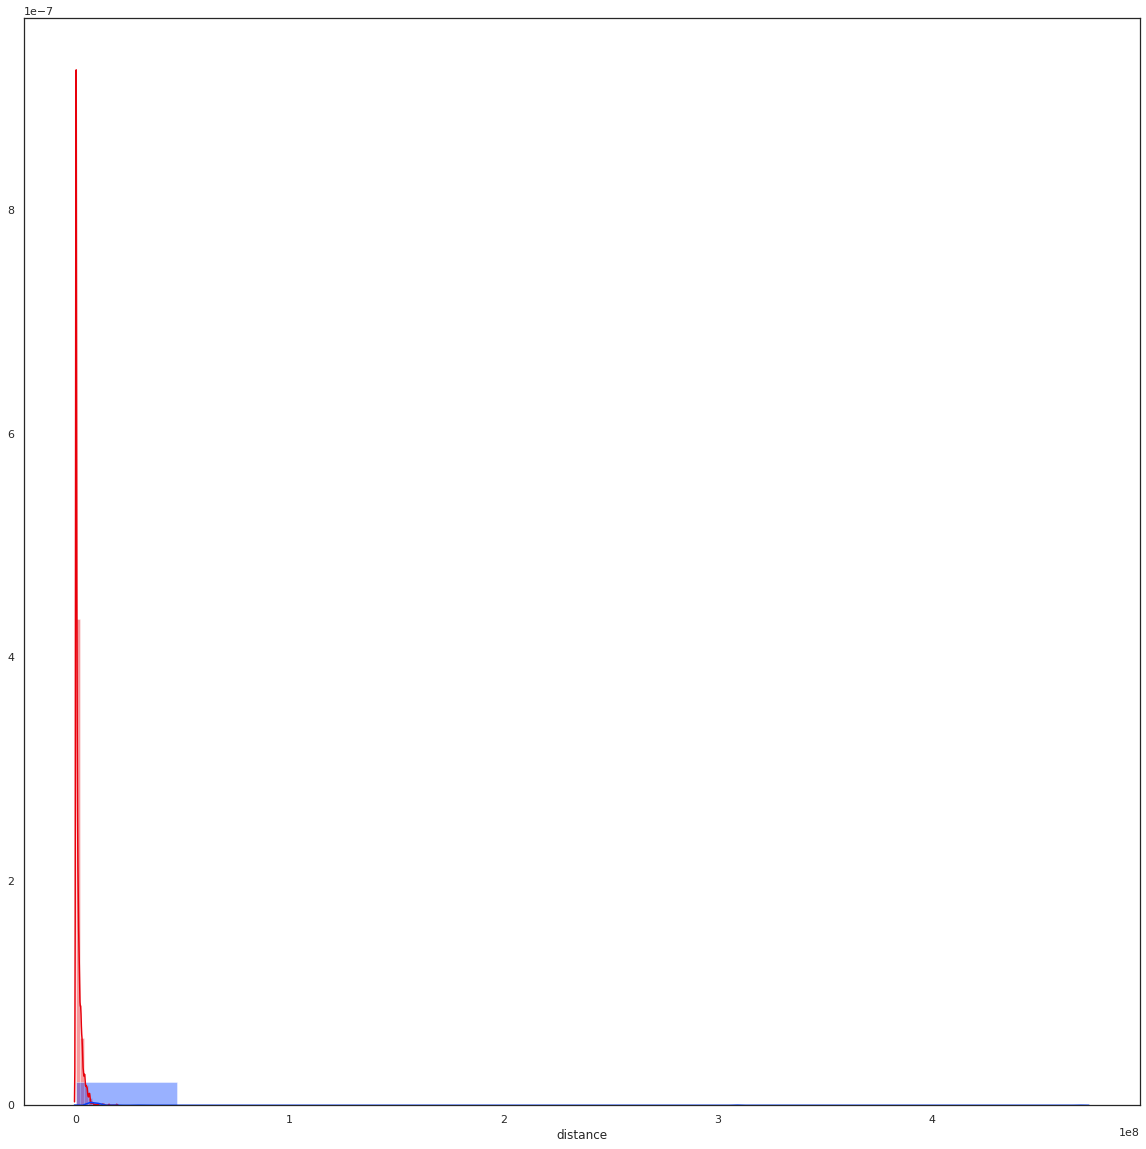

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# With sns.set you can adjust your graph, choose style - dark grid/white,
# color palette, font etc.
sns.set(style="white", palette="bright", color_codes=True)
# If you run both disttribution plots in the same cell, they
# will be plotted in an overlapping manner.
# Enter the column containing distance for each of the strands in a
# variable, choose bins and discerning colors. Plot the 
# distribution plot of both plus and minus strands.
sns.distplot(a=df_pybed_shuffled_plus["distance"], bins=10, color="r")
sns.distplot(a=df_pybed_shuffled_minus["distance"], bins=10, color="b")
# Adjust the size of the figure.
plt.gcf().set_size_inches((20, 20))

2. You can plot the plus and the minus strand into separate plots.

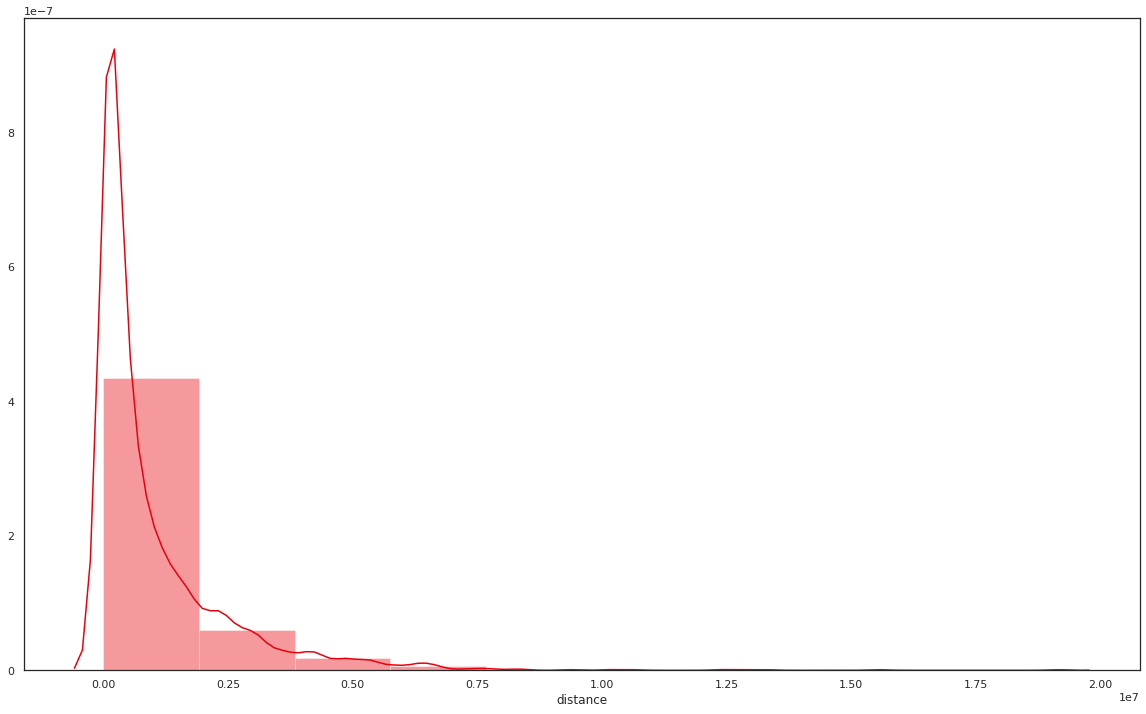

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pybed_shuffled_plus["distance"], bins=10, color="r")
plt.gcf().set_size_inches((20, 12))

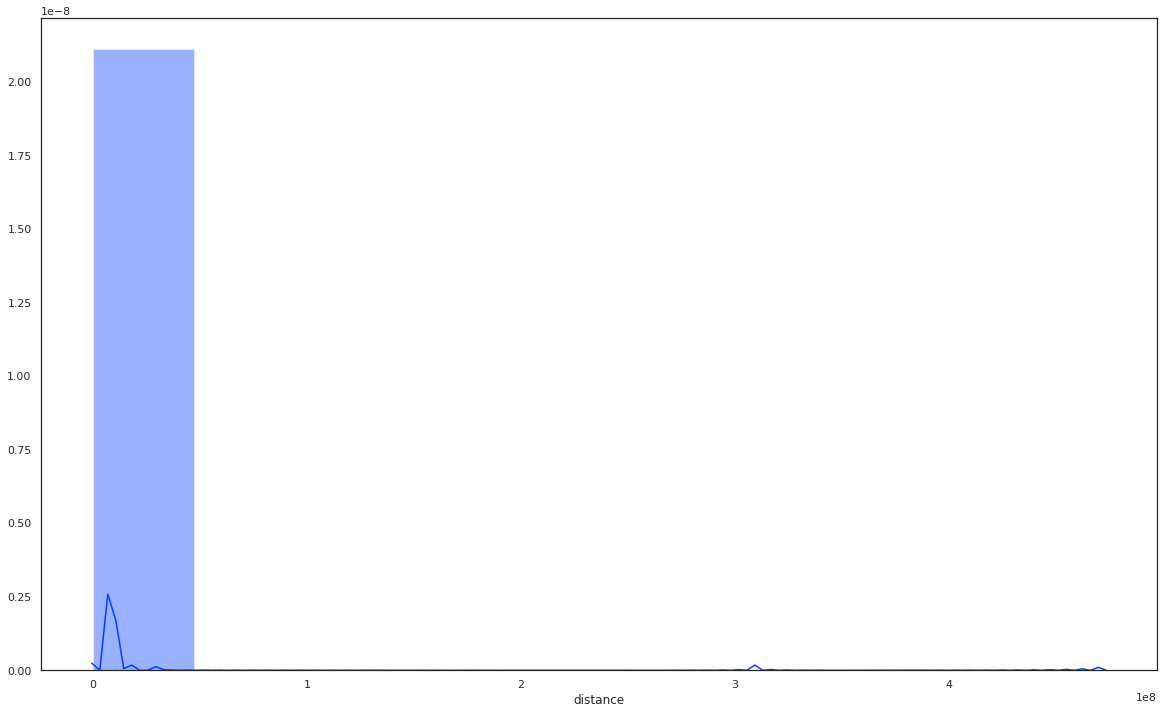

In [0]:
# Plot the distribution plot of the distances on 
# the plus strand.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=df_pybed_shuffled_minus["distance"], bins=10, color="b")
plt.gcf().set_size_inches((20, 12))

3. You can plot the plus and the minus strand into separate subplots using
distplot.

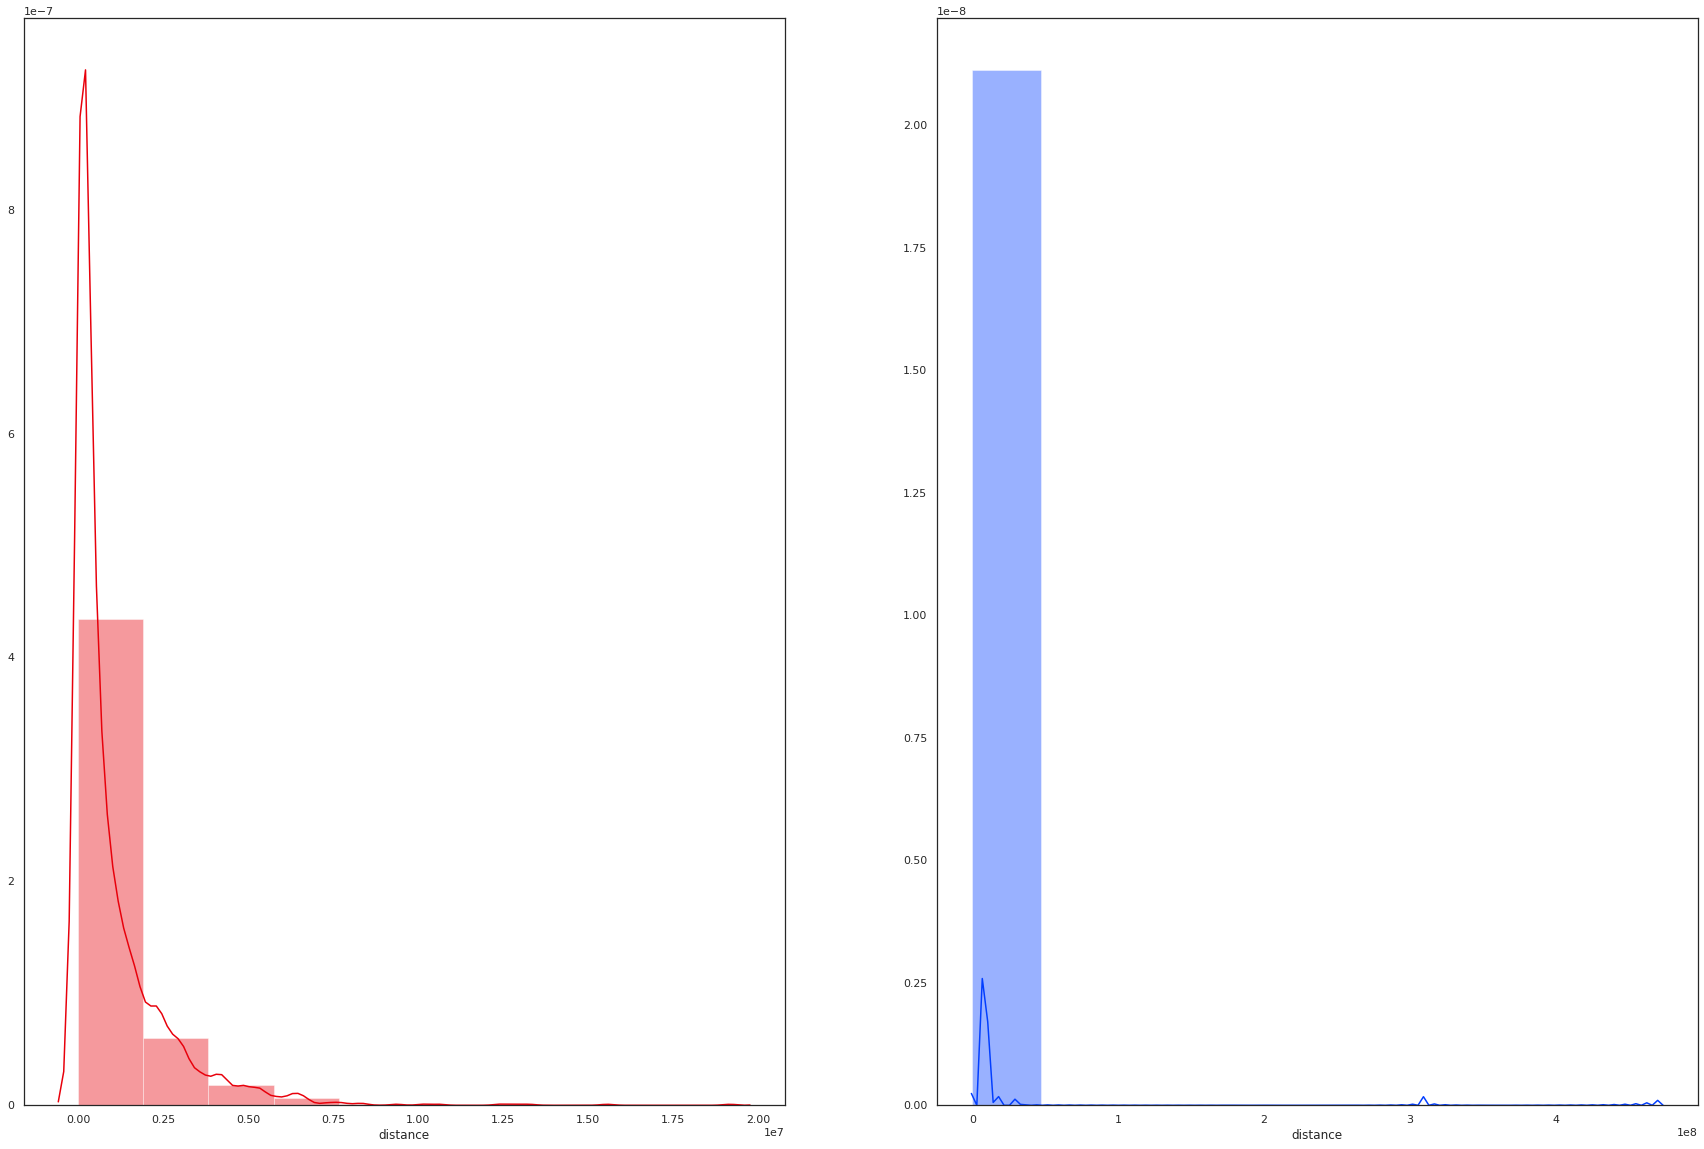

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="bright", color_codes=True)

# Set up the matplotlib figure. In your case, one row and 
# two columns, share x and y axis to compare them with
# each other. Once the subplots are created, you need to
# fill them with your data in the next step.
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)

# Plot a distribution plot for the plus strand in the left subplot
# ax=axes[0] and for the minus strand in the right subplot ax=axes[1].
sns.distplot(df_pybed_shuffled_plus["distance"], color="r", ax=axes[0], bins=10)
sns.distplot(df_pybed_shuffled_minus["distance"], color="b", ax=axes[1], bins=10)
plt.gcf().set_size_inches((30, 20))

#As for the data from FUS gene above, for the shuffled ones you are going to:

I. Count of the rows to estimate how many shuffled reads there are for each chromosome on plus and minus strand.

In [0]:
# Count the rows of the plus strand dataframe.
p_shuffled = df_pybed_shuffled_plus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Count the rows of the minus strand dataframe.
m_shuffled = df_pybed_shuffled_minus.set_index(["chromosome", "strand"]).count(level="chromosome")

In [0]:
# Merge plus and minus strand dataframe together.
dataframe_shuffled_both = p_shuffled.merge(m_shuffled, on='chromosome', suffixes=('_plus','_minus'))

II. The average distance between shuffled chromosome reads on plus and minus strand.

In [0]:
# Determine the mean value of each of the plus strand distances for each chromosome.
table_shuffled_plus = pd.pivot_table(df_pybed_shuffled_plus,index=['chromosome','strand'],values=["distance"],aggfunc="first")
pd.pivot_table(table_shuffled_plus,index=['chromosome', 'strand'],values=["distance"],aggfunc=np.mean)

,,distance
chromosome,strand,
chr1,+,318382
chr10,+,1213416
chr11,+,332603
chr12,+,4758573
chr13,+,5764918
chr14,+,2332083
chr15,+,1702114
chr16,+,109812
chr17,+,799096


In [0]:
# Determine the mean value of each of the minus strand distances for each chromosome.
table_shuffled_minus = pd.pivot_table(df_pybed_shuffled_minus,index=['chromosome','strand'],values=["distance"],aggfunc="first")
print(table_shuffled_minus)
pd.pivot_table(table_shuffled_minus,index=['chromosome', 'strand'],values=["distance"],aggfunc=np.mean)

                                 distance
chromosome              strand           
chr1                    -          868717
chr10                   -         1583383
chr11                   -          906814
chr12                   -         3186431
chr13                   -        30395256
chr14                   -         2449139
chr14_GL000194v1_random -       308805126
chr15                   -         9668257
chr16                   -          318806
chr17                   -          903234
chr18                   -         9351641
chr19                   -          252178
chr2                    -         4906952
chr20                   -          534336
chr21                   -          537918
chr22                   -           94480
chr3                    -         4754590
chr4                    -         1565468
chr5                    -         1796242
chr6                    -         6714193
chr7                    -         1326437
chr8                    -         

,,distance
chromosome,strand,
chr1,-,868717
chr10,-,1583383
chr11,-,906814
chr12,-,3186431
chr13,-,30395256
chr14,-,2449139
chr14_GL000194v1_random,-,308805126
chr15,-,9668257
chr16,-,318806


In [0]:
# Merge the plus and minus table with mean distances together.
table_shuffled_both = table_shuffled_plus.merge(table_shuffled_minus, on='chromosome', suffixes=('_plus','_minus'))
table_shuffled_both

,distance_plus,distance_minus
chromosome,,
chr1,318382,868717
chr10,1213416,1583383
chr11,332603,906814
chr12,4758573,3186431
chr13,5764918,30395256
chr14,2332083,2449139
chr15,1702114,9668257
chr16,109812,318806
chr17,799096,903234


III. Merge the table with reads count and the table with mean distances.

In [0]:
# Merge the plus and minus reads count table together with mean distances.
table_shuffled_all_info = dataframe_shuffled_both.merge(table_shuffled_both, on='chromosome', suffixes=(' ',''))
table_shuffled_all_info.columns=['+', '-', '+_average', '-_average']
print(table_shuffled_all_info)

              +    -  +_average  -_average
chromosome                                
chr1        170  173     318382     868717
chr10        48   93    1213416    1583383
chr11       202  106     332603     906814
chr12        45   45    4758573    3186431
chr13        37    6    5764918   30395256
chr14        33   32    2332083    2449139
chr15        36   31    1702114    9668257
chr16       317  251     109812     318806
chr17        68   96     799096     903234
chr18         6    2   12823805    9351641
chr19       464  165       9655     252178
chr2        137   74    2503595    4906952
chr20        40  102    2333165     534336
chr21        78   33     440855     537918
chr22       167  362      43629      94480
chr3         61   47     999861    4754590
chr4         39  100    3331901    1565468
chr5         65   52    1716982    1796242
chr6         49   21    4096558    6714193
chr7        101  111    1059834    1326437
chr8         36   48    1451497    1005835
chr9       

IV. Plot the plus and minus reads count table into distplot.

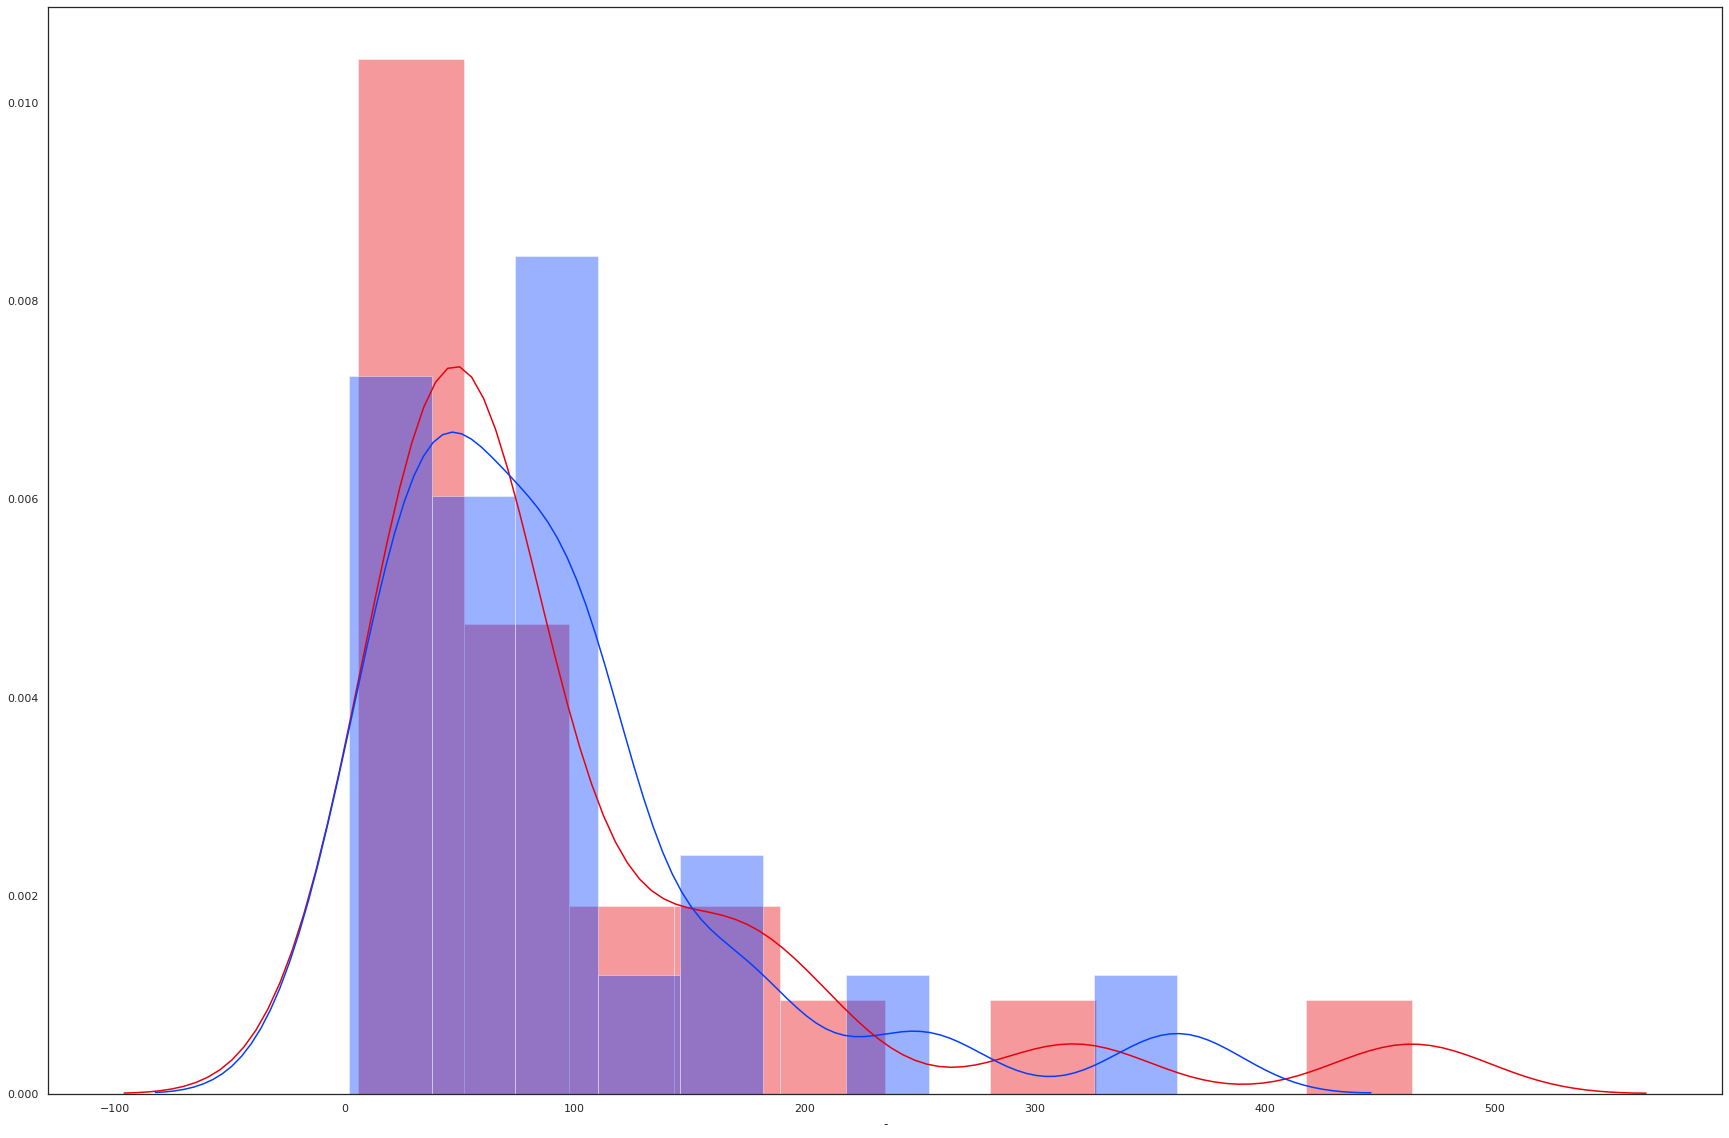

In [0]:
# Plot the plus and minus reads count table into distplot.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=table_shuffled_all_info["+"], bins=10, color="r")
sns.distplot(a=table_shuffled_all_info["-"], bins=10, color="b")

plt.gcf().set_size_inches((30, 20))

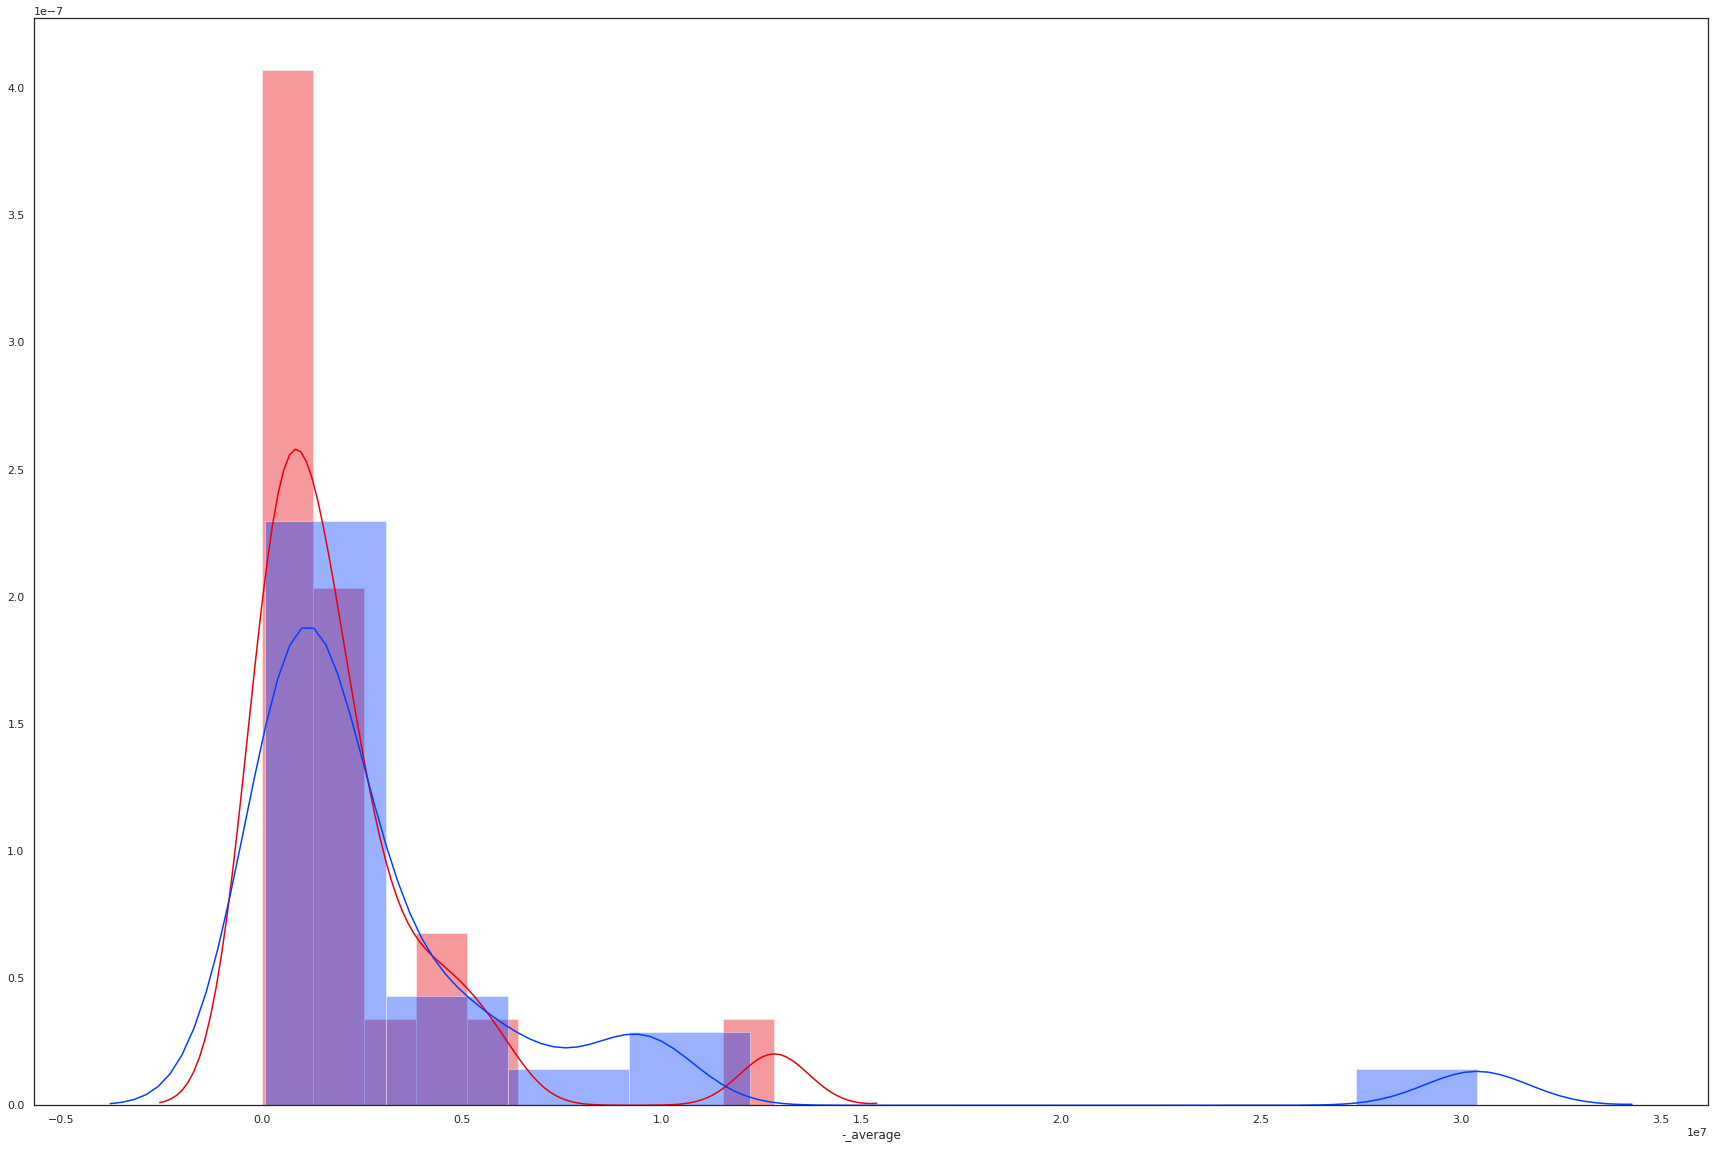

In [0]:
# Plot the plus and minus average distance table data into distplot.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="bright", color_codes=True)

sns.distplot(a=table_shuffled_all_info["+_average"], bins=10, color="r")
sns.distplot(a=table_shuffled_all_info["-_average"], bins=10, color="b")

plt.gcf().set_size_inches((30, 20))

# Additional shuffled data plots:

<BarContainer object of 2078 artists>

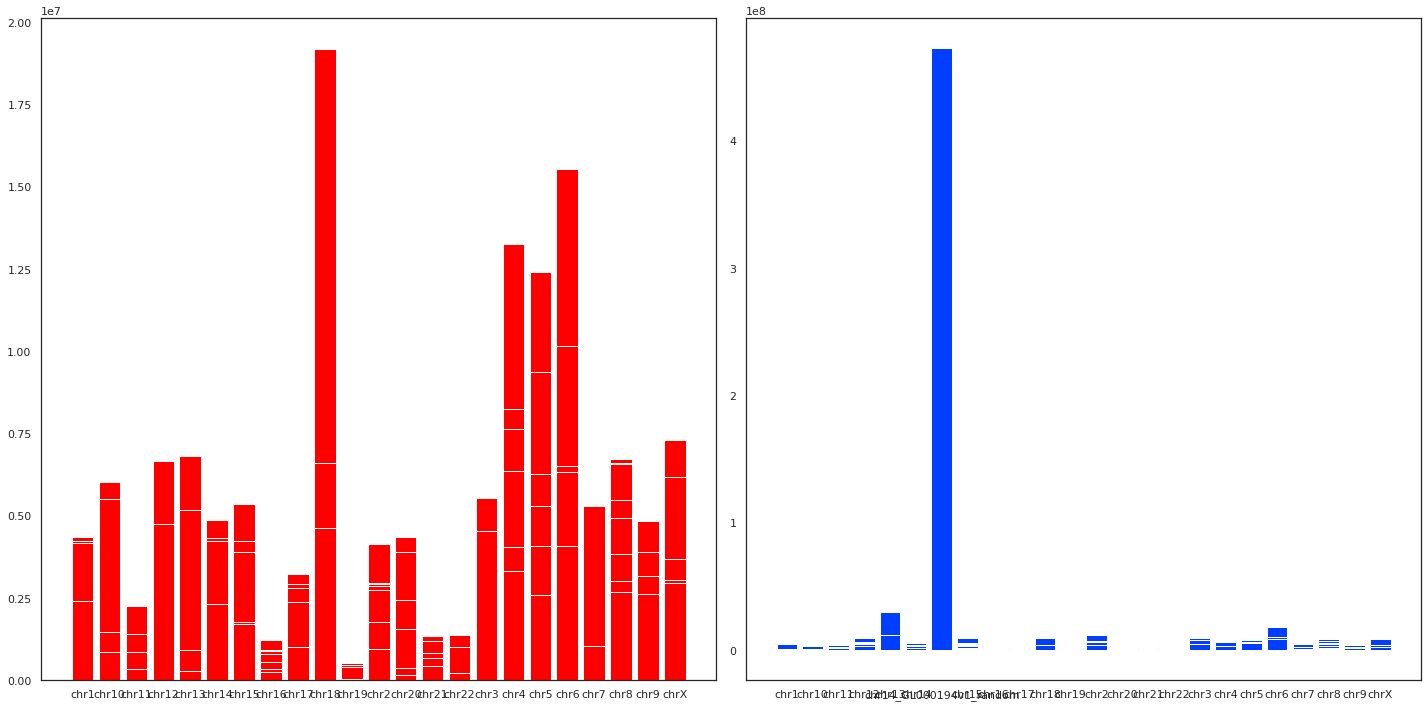

In [0]:
# Plot each of the chromosome with its distances separately into a bar plot.
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, tight_layout=True, figsize=(20,10))

axs[0].bar(df_pybed_shuffled_plus["chromosome"], df_pybed_shuffled_plus["distance"], color='red')

axs[1].bar(df_pybed_shuffled_minus["chromosome"], df_pybed_shuffled_minus["distance"])

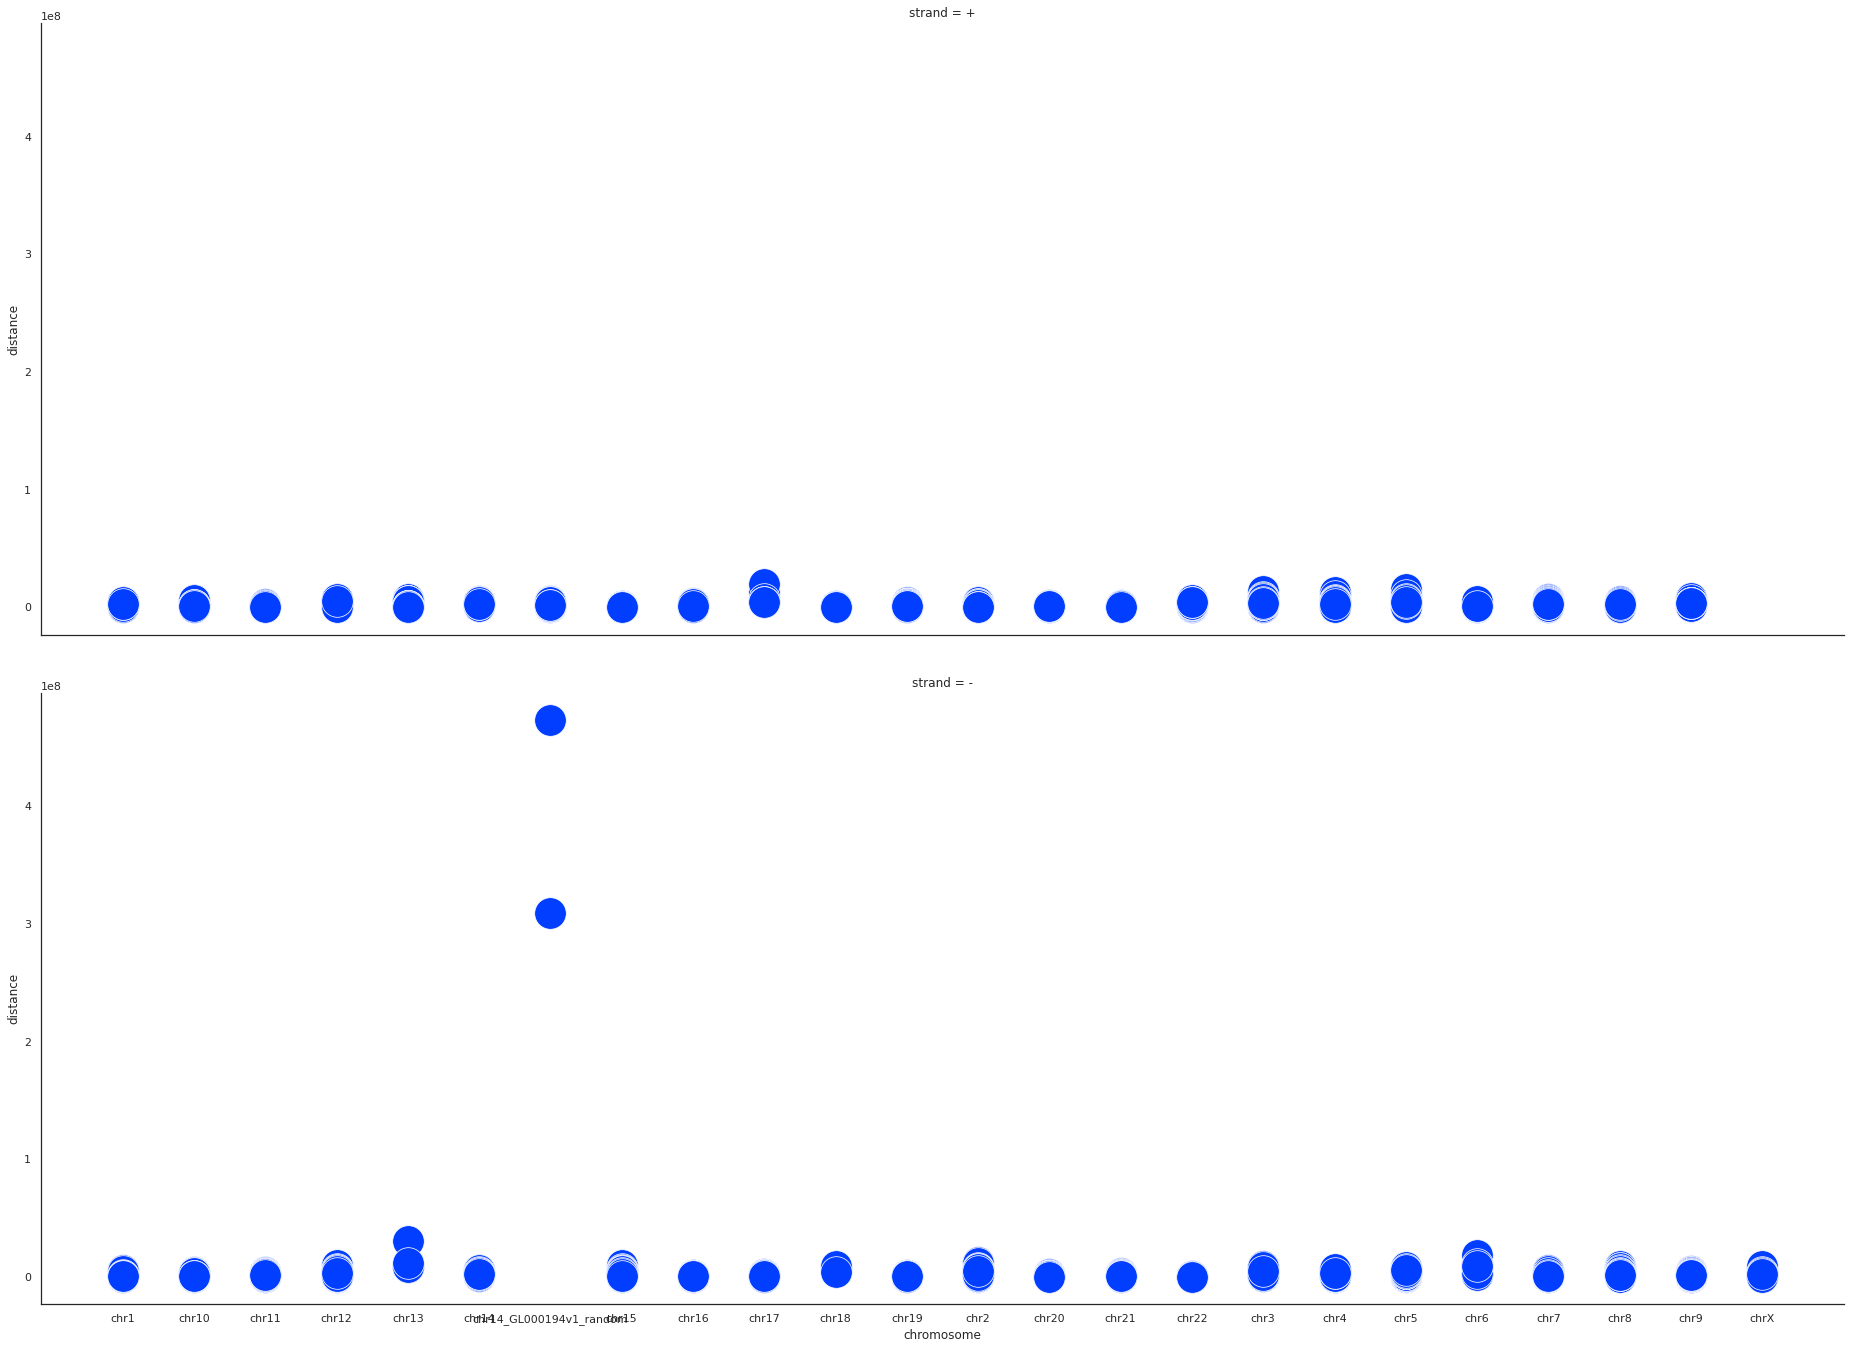

In [0]:
# Plot each of the chromosome with its distances separately into a scatter plot.
import seaborn as sns

dataframe_both_strands = pd.concat([df_pybed_shuffled_plus, df_pybed_shuffled_minus])

sns.relplot(
    x='chromosome',
    y='distance',
    row='strand',
    data=dataframe_both_strands,
    kind='scatter',
    s=1000
)
plt.gcf().set_size_inches((30, 20))